In [1]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# 📦 Install Wikipedia API
!pip install -q wikipedia-api

# 📚 Imports
import scipy.io
import pandas as pd
import numpy as np
import requests
import wikipediaapi
from datetime import datetime, timedelta

# === Load .mat file ===
wiki_mat_path = "/content/drive/MyDrive/Gladyshev/data/wiki_crop_unzip/wiki_crop/wiki.mat"
mat = scipy.io.loadmat(wiki_mat_path, struct_as_record=False, squeeze_me=True)
wiki = mat["wiki"]

# === Extract fields (first 10 only) ===
def extract(field): return getattr(wiki, field)[:10]

names = [str(n) for n in extract("name")]
dob = extract("dob")
photo_taken = extract("photo_taken")

# === Convert MATLAB datenum to Python dates ===
def matlab_datenum_to_date(datenum):
    origin = datetime.fromordinal(1)
    return [(origin + timedelta(days=float(d)-366)).date() if d > 0 else pd.NaT for d in datenum]

dob_converted = matlab_datenum_to_date(dob)

# === Wikidata API setup ===
wiki_wiki = wikipediaapi.Wikipedia('en', user_agent='WikiMortalityBot/1.0 (contact: your_email@example.com)')

def get_qid(name):
    page = wiki_wiki.page(name)
    return page.wikibase if page.exists() and hasattr(page, "wikibase") else None

def fetch_death_year(qid):
    url = f"https://www.wikidata.org/wiki/Special:EntityData/{qid}.json"
    try:
        r = requests.get(url)
        date_str = r.json()["entities"][qid]["claims"]["P570"][0]["mainsnak"]["datavalue"]["value"]["time"]
        return int(date_str[1:5])
    except:
        return None

# === Collect and compute ===
rows = []
for i in range(10):
    name_i = names[i]
    dob_i = dob_converted[i]
    photo_i = photo_taken[i]
    qid = get_qid(name_i)
    death_year = fetch_death_year(qid) if qid else None
    age_at_death = death_year - dob_i.year if death_year and pd.notna(dob_i) else None
    time_to_death = death_year - photo_i if death_year and pd.notna(photo_i) else None
    rows.append({
        "name": name_i,
        "death_year": death_year,
        "age_at_death": age_at_death,
        "time_to_death": time_to_death
    })

# === Print table ===
df_short = pd.DataFrame(rows)
print(df_short)

  Preparing metadata (setup.py) ... done


TypeError: Wikipedia.__init__() got multiple values for argument 'user_agent'

In [3]:
# 📦 Install Wikipedia API
!pip install -q wikipedia-api

# 📚 Imports
import scipy.io
import pandas as pd
import numpy as np
import requests
import wikipediaapi
from datetime import datetime, timedelta

# === Load .mat file ===
wiki_mat_path = "/content/drive/MyDrive/Gladyshev/data/wiki_crop_unzip/wiki_crop/wiki.mat"
mat = scipy.io.loadmat(wiki_mat_path, struct_as_record=False, squeeze_me=True)
wiki = mat["wiki"]

# === Extract fields (first 10 only) ===
def extract(field): return getattr(wiki, field)[:10]

names = [str(n) for n in extract("name")]
dob = extract("dob")
photo_taken = extract("photo_taken")

# === Convert MATLAB datenum to Python dates ===
def matlab_datenum_to_date(datenum):
    origin = datetime.fromordinal(1)
    return [(origin + timedelta(days=float(d)-366)).date() if d > 0 else pd.NaT for d in datenum]

dob_converted = matlab_datenum_to_date(dob)

# === Wikidata API setup ===
wiki_wiki = wikipediaapi.Wikipedia(
    language='en',
    user_agent='WikiMortalityBot/1.0 (contact: your_email@example.com)'
)

def get_qid(name):
    page = wiki_wiki.page(name)
    return page.wikibase if page.exists() and hasattr(page, "wikibase") else None

def fetch_death_year(qid):
    url = f"https://www.wikidata.org/wiki/Special:EntityData/{qid}.json"
    try:
        r = requests.get(url)
        date_str = r.json()["entities"][qid]["claims"]["P570"][0]["mainsnak"]["datavalue"]["value"]["time"]
        return int(date_str[1:5])
    except:
        return None

# === Collect and compute ===
rows = []
for i in range(10):
    name_i = names[i]
    dob_i = dob_converted[i]
    photo_i = photo_taken[i]
    qid = get_qid(name_i)
    death_year = fetch_death_year(qid) if qid else None
    age_at_death = death_year - dob_i.year if death_year and pd.notna(dob_i) else None
    time_to_death = death_year - photo_i if death_year and pd.notna(photo_i) else None
    rows.append({
        "name": name_i,
        "death_year": death_year,
        "age_at_death": age_at_death,
        "time_to_death": time_to_death
    })

# === Print table ===
df_short = pd.DataFrame(rows)
print(df_short)

                   name death_year age_at_death time_to_death
0       Sami Jauhojärvi       None         None          None
1        Dettmar Cramer       None         None          None
2           Marc Okrand       None         None          None
3  Aleksandar Matanović       None         None          None
4          Diana Damrau       None         None          None
5        Krista Tippett       None         None          None
6      Bernie Whitebear       None         None          None
7         Clarence Nash       None         None          None
8    William W. Destler       None         None          None
9          Daniel Smith       None         None          None


In [4]:
import scipy.io
import pandas as pd
import numpy as np
import requests
from datetime import datetime, timedelta

# === Load wiki.mat ===
wiki_mat_path = "/content/drive/MyDrive/Gladyshev/data/wiki_crop_unzip/wiki_crop/wiki.mat"
mat = scipy.io.loadmat(wiki_mat_path, struct_as_record=False, squeeze_me=True)
wiki = mat["wiki"]

# === Extract first 10 entries ===
def extract(field): return getattr(wiki, field)[:10]
names = [str(n) for n in extract("name")]
dob = extract("dob")
photo_taken = extract("photo_taken")

# === MATLAB datenum to date ===
def matlab_datenum_to_date(datenum):
    origin = datetime.fromordinal(1)
    return [(origin + timedelta(days=float(d) - 366)).date() if d > 0 else pd.NaT for d in datenum]

dob_converted = matlab_datenum_to_date(dob)

# === 🔍 Get Wikidata QID via search ===
def search_wikidata_qid(name):
    url = f"https://www.wikidata.org/w/api.php"
    params = {
        "action": "wbsearchentities",
        "search": name,
        "language": "en",
        "format": "json",
        "limit": 1
    }
    r = requests.get(url, params=params)
    try:
        return r.json()["search"][0]["id"]
    except:
        return None

# === 📅 Fetch death year from Wikidata ===
def fetch_death_year(qid):
    if qid is None:
        return None
    url = f"https://www.wikidata.org/wiki/Special:EntityData/{qid}.json"
    try:
        r = requests.get(url)
        entity = r.json()["entities"][qid]
        date_str = entity["claims"]["P570"][0]["mainsnak"]["datavalue"]["value"]["time"]
        return int(date_str[1:5])  # Format: '+2015-01-01T00:00:00Z'
    except:
        return None

# === 🧠 Process and print ===
results = []
for i in range(10):
    name_i = names[i]
    dob_i = dob_converted[i]
    photo_i = photo_taken[i]

    qid = search_wikidata_qid(name_i)
    death_year = fetch_death_year(qid)
    age_at_death = death_year - dob_i.year if death_year and pd.notna(dob_i) else None
    time_to_death = death_year - photo_i if death_year and pd.notna(photo_i) else None

    results.append({
        "name": name_i,
        "death_year": death_year,
        "age_at_death": age_at_death,
        "time_to_death": time_to_death
    })

# === Output DataFrame ===
df_preview = pd.DataFrame(results)
print(df_preview)

                   name  death_year  age_at_death  time_to_death
0       Sami Jauhojärvi         NaN           NaN            NaN
1        Dettmar Cramer      2015.0          90.0           51.0
2           Marc Okrand         NaN           NaN            NaN
3  Aleksandar Matanović      2023.0          93.0           62.0
4          Diana Damrau         NaN           NaN            NaN
5        Krista Tippett         NaN           NaN            NaN
6      Bernie Whitebear         NaN           NaN            NaN
7         Clarence Nash         NaN           NaN            NaN
8    William W. Destler         NaN           NaN            NaN
9          Daniel Smith         NaN           NaN            NaN


In [5]:
# 📦 Install required library
!pip install -q wikipedia-api

# 📚 Imports
import scipy.io
import pandas as pd
import numpy as np
import requests
from datetime import datetime, timedelta
from tqdm import tqdm

# === Load wiki.mat ===
wiki_mat_path = "/content/drive/MyDrive/Gladyshev/data/wiki_crop_unzip/wiki_crop/wiki.mat"
mat = scipy.io.loadmat(wiki_mat_path, struct_as_record=False, squeeze_me=True)
wiki = mat["wiki"]

# === Extract fields ===
names = [str(n) for n in getattr(wiki, "name")]
dob = getattr(wiki, "dob")
photo_taken = getattr(wiki, "photo_taken")

# === Convert MATLAB datenum to datetime ===
def matlab_datenum_to_date(datenum):
    origin = datetime.fromordinal(1)
    return [
        (origin + timedelta(days=float(d) - 366)).date() if d > 0 else pd.NaT
        for d in datenum
    ]

dob_converted = matlab_datenum_to_date(dob)

# === SPARQL cause of death query ===
def get_cause_of_death(name):
    query = f"""
    SELECT ?causeLabel WHERE {{
      ?person ?label "{name}"@en.
      ?person wdt:P509 ?cause.
      SERVICE wikibase:label {{ bd:serviceParam wikibase:language "en". }}
    }}
    LIMIT 3
    """
    url = "https://query.wikidata.org/sparql"
    headers = {"Accept": "application/sparql-results+json"}
    try:
        response = requests.get(url, params={'query': query}, headers=headers, timeout=20)
        response.raise_for_status()
        results = response.json()['results']['bindings']
        if not results:
            return None
        return ", ".join([r['causeLabel']['value'] for r in results])
    except:
        return None

# === Wikidata API for death year ===
def get_death_year(name):
    query = f"""
    SELECT ?death WHERE {{
      ?person ?label "{name}"@en.
      ?person wdt:P570 ?death.
    }}
    LIMIT 1
    """
    url = "https://query.wikidata.org/sparql"
    headers = {"Accept": "application/sparql-results+json"}
    try:
        response = requests.get(url, params={'query': query}, headers=headers, timeout=20)
        response.raise_for_status()
        results = response.json()['results']['bindings']
        if not results:
            return None
        death_time = results[0]['death']['value']
        return int(death_time[:4])
    except:
        return None

# === Process first 10 names ===
results = []
print("🔍 Fetching data for first 10 entries...")
for i in tqdm(range(10)):
    name = names[i]
    year_of_birth = dob_converted[i].year if pd.notna(dob_converted[i]) else None
    photo_year = photo_taken[i]

    death_year = get_death_year(name)
    cause = get_cause_of_death(name)

    age_at_death = death_year - year_of_birth if death_year and year_of_birth else None
    time_to_death = death_year - photo_year if death_year and photo_year else None

    results.append({
        "name": name,
        "death_year": death_year,
        "age_at_death": age_at_death,
        "time_to_death": time_to_death,
        "cause_of_death": cause
    })

df_preview = pd.DataFrame(results)
print(df_preview)

🔍 Fetching data for first 10 entries...


100%|██████████| 10/10 [00:00<00:00, 11.95it/s]

                   name  death_year  age_at_death  time_to_death  \
0       Sami Jauhojärvi         NaN           NaN            NaN   
1        Dettmar Cramer      2023.0          98.0           59.0   
2           Marc Okrand         NaN           NaN            NaN   
3  Aleksandar Matanović      2023.0          93.0           62.0   
4          Diana Damrau         NaN           NaN            NaN   
5        Krista Tippett         NaN           NaN            NaN   
6      Bernie Whitebear         NaN           NaN            NaN   
7         Clarence Nash         NaN           NaN            NaN   
8    William W. Destler         NaN           NaN            NaN   
9          Daniel Smith         NaN           NaN            NaN   

  cause_of_death  
0           None  
1           None  
2           None  
3           None  
4           None  
5           None  
6           None  
7           None  
8           None  
9           None  


In [6]:
# 📦 Install required package
!pip install -q wikipedia-api

# 📚 Imports
import scipy.io
import pandas as pd
import numpy as np
import requests
import wikipediaapi
from datetime import datetime, timedelta
from tqdm import tqdm

# === Load wiki.mat ===
wiki_mat_path = "/content/drive/MyDrive/Gladyshev/data/wiki_crop_unzip/wiki_crop/wiki.mat"
mat = scipy.io.loadmat(wiki_mat_path, struct_as_record=False, squeeze_me=True)
wiki = mat["wiki"]

# === Extract fields ===
def extract_field(field):
    return getattr(wiki, field)

names = [str(n) for n in extract_field("name")[:10]]
dob = extract_field("dob")[:10]
photo_taken = extract_field("photo_taken")[:10]

# === MATLAB datenum to date ===
def matlab_datenum_to_date(datenum):
    origin = datetime.fromordinal(1)
    return [(origin + timedelta(days=float(d) - 366)).date() if d > 0 else pd.NaT for d in datenum]

dob_converted = matlab_datenum_to_date(dob)

# === Setup Wikipedia API ===
wiki_wiki = wikipediaapi.Wikipedia(language='en', user_agent='WikiMortalityBot/1.0 (contact: your_email@example.com)')

def get_qid(name):
    page = wiki_wiki.page(name)
    if page.exists() and hasattr(page, "wikibase"):
        return page.wikibase
    return None

def fetch_death_year(qid):
    url = f"https://www.wikidata.org/wiki/Special:EntityData/{qid}.json"
    r = requests.get(url)
    if r.status_code != 200:
        return None
    try:
        data = r.json()
        date_str = data["entities"][qid]["claims"]["P570"][0]["mainsnak"]["datavalue"]["value"]["time"]
        return int(date_str[1:5])
    except:
        return None

def get_cause_of_death(name, death_year=None):
    death_filter = f'?person wdt:P570 ?death . FILTER(YEAR(?death) = {int(death_year)})' if death_year else ''
    query = f"""
    SELECT ?causeLabel WHERE {{
      ?person ?label "{name}"@en.
      {death_filter}
      ?person wdt:P509 ?cause.
      SERVICE wikibase:label {{ bd:serviceParam wikibase:language "en". }}
    }}
    LIMIT 3
    """
    url = "https://query.wikidata.org/sparql"
    headers = {"Accept": "application/sparql-results+json"}
    try:
        response = requests.get(url, params={'query': query}, headers=headers, timeout=20)
        response.raise_for_status()
        results = response.json()['results']['bindings']
        if not results:
            return None
        return ", ".join([r['causeLabel']['value'] for r in results])
    except:
        return None

# === Collect data for first 10 ===
results = []

print("🔍 Fetching data for first 10 entries...")
for i in tqdm(range(10)):
    name = names[i]
    dob_dt = dob_converted[i]
    photo_year = photo_taken[i]

    qid = get_qid(name)
    if qid:
        death_year = fetch_death_year(qid)
        cause = get_cause_of_death(name, death_year)
    else:
        death_year, cause = None, None

    age_at_death = death_year - dob_dt.year if death_year and pd.notna(dob_dt) else None
    time_to_death = death_year - photo_year if death_year and pd.notna(photo_year) else None

    results.append({
        "name": name,
        "qid": qid,
        "death_year": death_year,
        "age_at_death": age_at_death,
        "time_to_death": time_to_death,
        "cause_of_death": cause
    })

# === Display as DataFrame ===
df_results = pd.DataFrame(results)
print(df_results)


🔍 Fetching data for first 10 entries...


100%|██████████| 10/10 [00:00<00:00, 11.21it/s]

                   name   qid death_year age_at_death time_to_death  \
0       Sami Jauhojärvi  None       None         None          None   
1        Dettmar Cramer  None       None         None          None   
2           Marc Okrand  None       None         None          None   
3  Aleksandar Matanović  None       None         None          None   
4          Diana Damrau  None       None         None          None   
5        Krista Tippett  None       None         None          None   
6      Bernie Whitebear  None       None         None          None   
7         Clarence Nash  None       None         None          None   
8    William W. Destler  None       None         None          None   
9          Daniel Smith  None       None         None          None   

  cause_of_death  
0           None  
1           None  
2           None  
3           None  
4           None  
5           None  
6           None  
7           None  
8           None  
9           None  


In [7]:
# 📦 Install dependency
!pip install -q wikipedia-api

# 📚 Imports
import scipy.io
import pandas as pd
import numpy as np
import requests
import wikipediaapi
from datetime import datetime, timedelta
from tqdm import tqdm

# === Load .mat file and extract first 10 ===
wiki_mat_path = "/content/drive/MyDrive/Gladyshev/data/wiki_crop_unzip/wiki_crop/wiki.mat"
mat = scipy.io.loadmat(wiki_mat_path, struct_as_record=False, squeeze_me=True)
wiki = mat["wiki"]

names = [str(n) for n in wiki.name][:10]
dob = wiki.dob[:10]
photo_taken = wiki.photo_taken[:10]

# === Convert MATLAB datenum to date ===
def matlab_datenum_to_date(datenum):
    origin = datetime.fromordinal(1)
    return [
        (origin + timedelta(days=float(d) - 366)).date() if d > 0 else pd.NaT
        for d in datenum
    ]

dob_converted = matlab_datenum_to_date(dob)

# === Wikipedia API Setup ===
wiki_wiki = wikipediaapi.Wikipedia(
    language='en',
    user_agent='WikiMortalityBot/1.0 (contact: your_email@example.com)'  # Replace with real contact
)

# === QID + Wikidata fetch ===
def get_qid(name):
    page = wiki_wiki.page(name)
    if page.exists() and hasattr(page, "wikibase"):
        return page.wikibase
    return None

def fetch_death_info(qid):
    url = f"https://www.wikidata.org/wiki/Special:EntityData/{qid}.json"
    try:
        r = requests.get(url, timeout=10)
        r.raise_for_status()
        data = r.json()
        entity = data["entities"][qid]
        claims = entity.get("claims", {})

        death_year = None
        cause = None

        if "P570" in claims:
            date_str = claims["P570"][0]["mainsnak"]["datavalue"]["value"]["time"]
            death_year = int(date_str[1:5])

        if "P509" in claims:
            cause_id = claims["P509"][0]["mainsnak"]["datavalue"]["value"]["id"]
            cause_url = f"https://www.wikidata.org/wiki/Special:EntityData/{cause_id}.json"
            cause_data = requests.get(cause_url).json()
            cause = cause_data["entities"][cause_id]["labels"]["en"]["value"]

        return death_year, cause
    except:
        return None, None

# === Process first 10 ===
qid_list = []
death_years = []
cause_of_deaths = []
ages = []
ttd = []

print("🔍 Fetching data for first 10 entries...")
for i in tqdm(range(10)):
    name = names[i]
    birth = dob_converted[i]
    photo_year = photo_taken[i]

    qid = get_qid(name)
    qid_list.append(qid)

    if qid:
        death_year, cause = fetch_death_info(qid)
    else:
        death_year, cause = None, None

    death_years.append(death_year)
    cause_of_deaths.append(cause)

    # Derived columns
    if pd.notna(birth) and death_year:
        ages.append(death_year - birth.year)
    else:
        ages.append(None)

    if death_year and pd.notna(photo_year):
        ttd.append(death_year - photo_year)
    else:
        ttd.append(None)

# === Final DataFrame ===
df = pd.DataFrame({
    "name": names,
    "qid": qid_list,
    "death_year": death_years,
    "age_at_death": ages,
    "time_to_death": ttd,
    "cause_of_death": cause_of_deaths
})

print(df)


🔍 Fetching data for first 10 entries...


100%|██████████| 10/10 [00:00<00:00, 11.32it/s]

                   name   qid death_year age_at_death time_to_death  \
0       Sami Jauhojärvi  None       None         None          None   
1        Dettmar Cramer  None       None         None          None   
2           Marc Okrand  None       None         None          None   
3  Aleksandar Matanović  None       None         None          None   
4          Diana Damrau  None       None         None          None   
5        Krista Tippett  None       None         None          None   
6      Bernie Whitebear  None       None         None          None   
7         Clarence Nash  None       None         None          None   
8    William W. Destler  None       None         None          None   
9          Daniel Smith  None       None         None          None   

  cause_of_death  
0           None  
1           None  
2           None  
3           None  
4           None  
5           None  
6           None  
7           None  
8           None  
9           None  


In [8]:
# 📦 Install required library
!pip install -q wikipedia-api

# 📚 Imports
import scipy.io
import pandas as pd
import numpy as np
import requests
from datetime import datetime, timedelta
from tqdm import tqdm

# === Load wiki.mat ===
wiki_mat_path = "/content/drive/MyDrive/Gladyshev/data/wiki_crop_unzip/wiki_crop/wiki.mat"
mat = scipy.io.loadmat(wiki_mat_path, struct_as_record=False, squeeze_me=True)
wiki = mat["wiki"]

# === Extract fields ===
names = [str(n) for n in getattr(wiki, "name")]
dob = getattr(wiki, "dob")
photo_taken = getattr(wiki, "photo_taken")

# === Convert MATLAB datenum to datetime ===
def matlab_datenum_to_date(datenum):
    origin = datetime.fromordinal(1)
    return [
        (origin + timedelta(days=float(d) - 366)).date() if d > 0 else pd.NaT
        for d in datenum
    ]

dob_converted = matlab_datenum_to_date(dob)

# === SPARQL query for cause of death ===
def get_cause_of_death(name):
    query = f"""
    SELECT ?causeLabel WHERE {{
      ?person ?label "{name}"@en.
      ?person wdt:P509 ?cause.
      SERVICE wikibase:label {{ bd:serviceParam wikibase:language "en". }}
    }}
    LIMIT 3
    """
    url = "https://query.wikidata.org/sparql"
    headers = {"Accept": "application/sparql-results+json"}
    try:
        response = requests.get(url, params={'query': query}, headers=headers, timeout=20)
        response.raise_for_status()
        results = response.json()['results']['bindings']
        if not results:
            return None
        return ", ".join([r['causeLabel']['value'] for r in results])
    except:
        return None

# === SPARQL query for death year ===
def get_death_year(name):
    query = f"""
    SELECT ?death WHERE {{
      ?person ?label "{name}"@en.
      ?person wdt:P570 ?death.
    }}
    LIMIT 1
    """
    url = "https://query.wikidata.org/sparql"
    headers = {"Accept": "application/sparql-results+json"}
    try:
        response = requests.get(url, params={'query': query}, headers=headers, timeout=20)
        response.raise_for_status()
        results = response.json()['results']['bindings']
        if not results:
            return None
        death_time = results[0]['death']['value']
        return int(death_time[:4])
    except:
        return None

# === Process first 10 names ===
results = []
print("🔍 Fetching data for first 10 entries...")
for i in tqdm(range(10)):
    name = names[i]
    year_of_birth = dob_converted[i].year if pd.notna(dob_converted[i]) else None
    photo_year = photo_taken[i]

    death_year = get_death_year(name)
    cause = get_cause_of_death(name)

    age_at_death = death_year - year_of_birth if death_year and year_of_birth else None
    time_to_death = death_year - photo_year if death_year and photo_year else None

    results.append({
        "name": name,
        "death_year": death_year,
        "age_at_death": age_at_death,
        "time_to_death": time_to_death,
        "cause_of_death": cause
    })

# === Preview result ===
df_preview = pd.DataFrame(results)
print(df_preview)


🔍 Fetching data for first 10 entries...


100%|██████████| 10/10 [00:00<00:00, 39.68it/s]

                   name  death_year  age_at_death  time_to_death  \
0       Sami Jauhojärvi         NaN           NaN            NaN   
1        Dettmar Cramer      2023.0          98.0           59.0   
2           Marc Okrand         NaN           NaN            NaN   
3  Aleksandar Matanović      2023.0          93.0           62.0   
4          Diana Damrau         NaN           NaN            NaN   
5        Krista Tippett         NaN           NaN            NaN   
6      Bernie Whitebear         NaN           NaN            NaN   
7         Clarence Nash         NaN           NaN            NaN   
8    William W. Destler         NaN           NaN            NaN   
9          Daniel Smith         NaN           NaN            NaN   

  cause_of_death  
0           None  
1           None  
2           None  
3           None  
4           None  
5           None  
6           None  
7           None  
8           None  
9           None  


In [9]:
names = ["Dettmar Cramer", "Paul Walker", "Robin Williams"]
for name in names:
    print(name)
    print("Death year:", get_death_year(name))
    print("Cause:", get_cause_of_death(name))
    print("—" * 40)


Dettmar Cramer
Death year: 2023
Cause: None
————————————————————————————————————————
Paul Walker
Death year: 2013
Cause: single-vehicle accident, single-vehicle accident
————————————————————————————————————————
Robin Williams
Death year: 2014
Cause: hanging, hanging, disease
————————————————————————————————————————


In [10]:
# 📦 Install required library
!pip install -q wikipedia-api

# 📚 Imports
import scipy.io
import pandas as pd
import numpy as np
import requests
from datetime import datetime, timedelta
from tqdm import tqdm

# === Load wiki.mat ===
wiki_mat_path = "/content/drive/MyDrive/Gladyshev/data/wiki_crop_unzip/wiki_crop/wiki.mat"
mat = scipy.io.loadmat(wiki_mat_path, struct_as_record=False, squeeze_me=True)
wiki = mat["wiki"]

# === Extract fields ===
names = [str(n) for n in getattr(wiki, "name")]
dob = getattr(wiki, "dob")
photo_taken = getattr(wiki, "photo_taken")

# === Convert MATLAB datenum to datetime ===
def matlab_datenum_to_date(datenum):
    origin = datetime.fromordinal(1)
    return [
        (origin + timedelta(days=float(d) - 366)).date() if d > 0 else pd.NaT
        for d in datenum
    ]

dob_converted = matlab_datenum_to_date(dob)

# === SPARQL query for death year ===
def get_death_year(name):
    query = f"""
    SELECT ?death WHERE {{
      ?person ?label "{name}"@en.
      ?person wdt:P570 ?death.
    }}
    LIMIT 1
    """
    url = "https://query.wikidata.org/sparql"
    headers = {"Accept": "application/sparql-results+json"}
    try:
        response = requests.get(url, params={'query': query}, headers=headers, timeout=20)
        response.raise_for_status()
        results = response.json()['results']['bindings']
        if not results:
            return None
        death_time = results[0]['death']['value']
        return int(death_time[:4])
    except:
        return None

# === SPARQL query for cause of death ===
def get_cause_of_death(name):
    query = f"""
    SELECT ?causeLabel WHERE {{
      ?person ?label "{name}"@en.
      ?person wdt:P509 ?cause.
      SERVICE wikibase:label {{ bd:serviceParam wikibase:language "en". }}
    }}
    LIMIT 5
    """
    url = "https://query.wikidata.org/sparql"
    headers = {"Accept": "application/sparql-results+json"}
    try:
        response = requests.get(url, params={'query': query}, headers=headers, timeout=20)
        response.raise_for_status()
        results = response.json()['results']['bindings']
        if not results:
            return None
        causes = list({r['causeLabel']['value'] for r in results})  # deduplicate
        return ", ".join(causes)
    except:
        return None

# === Process first 10 entries ===
results = []
print("🔍 Fetching data for first 10 entries...")
for i in tqdm(range(10)):
    name = names[i]
    year_of_birth = dob_converted[i].year if pd.notna(dob_converted[i]) else None
    photo_year = photo_taken[i]

    death_year = get_death_year(name)
    cause = get_cause_of_death(name)

    age_at_death = death_year - year_of_birth if death_year and year_of_birth else None
    time_to_death = death_year - photo_year if death_year and photo_year else None

    results.append({
        "name": name,
        "death_year": death_year,
        "age_at_death": age_at_death,
        "time_to_death": time_to_death,
        "cause_of_death": cause
    })

# === Show results ===
df_preview = pd.DataFrame(results)
pd.set_option("display.max_colwidth", None)
print(df_preview)

🔍 Fetching data for first 10 entries...


100%|██████████| 10/10 [00:00<00:00, 16.52it/s]

                   name  death_year  age_at_death  time_to_death  \
0       Sami Jauhojärvi         NaN           NaN            NaN   
1        Dettmar Cramer      2023.0          98.0           59.0   
2           Marc Okrand         NaN           NaN            NaN   
3  Aleksandar Matanović      2023.0          93.0           62.0   
4          Diana Damrau         NaN           NaN            NaN   
5        Krista Tippett         NaN           NaN            NaN   
6      Bernie Whitebear         NaN           NaN            NaN   
7         Clarence Nash         NaN           NaN            NaN   
8    William W. Destler         NaN           NaN            NaN   
9          Daniel Smith         NaN           NaN            NaN   

  cause_of_death  
0           None  
1           None  
2           None  
3           None  
4           None  
5           None  
6           None  
7           None  
8           None  
9           None  


In [11]:
names = ["Dettmar Cramer", "Paul Walker", "Robin Williams"]
for name in names:
    print(name)
    print("Death year:", get_death_year(name))
    print("Cause:", get_cause_of_death(name))
    print("—" * 40)


Dettmar Cramer
Death year: 2023
Cause: None
————————————————————————————————————————
Paul Walker
Death year: 2013
Cause: single-vehicle accident
————————————————————————————————————————
Robin Williams
Death year: 2014
Cause: disease, hanging
————————————————————————————————————————


In [14]:
# 📦 Install required library
!pip install -q wikipedia-api

# 📚 Imports
import scipy.io
import pandas as pd
import numpy as np
import requests
from datetime import datetime, timedelta
from tqdm import tqdm

# === Load wiki.mat ===
wiki_mat_path = "/content/drive/MyDrive/Gladyshev/data/wiki_crop_unzip/wiki_crop/wiki.mat"
mat = scipy.io.loadmat(wiki_mat_path, struct_as_record=False, squeeze_me=True)
wiki = mat["wiki"]

# === Extract fields ===
names = [str(n) for n in getattr(wiki, "name")]
dob = getattr(wiki, "dob")
photo_taken = getattr(wiki, "photo_taken")

# === Convert MATLAB datenum to datetime ===
def matlab_datenum_to_date(datenum):
    origin = datetime.fromordinal(1)
    return [
        (origin + timedelta(days=float(d) - 366)).date() if d > 0 else pd.NaT
        for d in datenum
    ]

dob_converted = matlab_datenum_to_date(dob)

# === Get Wikidata QID from name ===
def get_qid(name):
    query = f"""
    SELECT ?person WHERE {{
      ?person rdfs:label "{name}"@en.
    }}
    LIMIT 1
    """
    url = "https://query.wikidata.org/sparql"
    headers = {"Accept": "application/sparql-results+json"}
    try:
        r = requests.get(url, params={"query": query}, headers=headers, timeout=20)
        r.raise_for_status()
        results = r.json()["results"]["bindings"]
        if not results:
            return None
        uri = results[0]["person"]["value"]
        return uri.split("/")[-1]
    except:
        return None

# === Get death year from Wikidata ===
def get_death_year(name):
    query = f"""
    SELECT ?death WHERE {{
      ?person rdfs:label "{name}"@en.
      ?person wdt:P570 ?death.
    }}
    LIMIT 1
    """
    url = "https://query.wikidata.org/sparql"
    headers = {"Accept": "application/sparql-results+json"}
    try:
        r = requests.get(url, params={"query": query}, headers=headers, timeout=20)
        r.raise_for_status()
        results = r.json()["results"]["bindings"]
        if not results:
            return None
        death_time = results[0]["death"]["value"]
        return int(death_time[:4])
    except:
        return None

# === Get cause of death from QID ===
def get_cause_of_death_from_qid(qid):
    if qid is None:
        return None
    query = f"""
    SELECT ?causeLabel WHERE {{
      wd:{qid} wdt:P509 ?cause.
      SERVICE wikibase:label {{ bd:serviceParam wikibase:language "en". }}
    }}
    LIMIT 5
    """
    url = "https://query.wikidata.org/sparql"
    headers = {"Accept": "application/sparql-results+json"}
    try:
        r = requests.get(url, params={"query": query}, headers=headers, timeout=20)
        r.raise_for_status()
        results = r.json()["results"]["bindings"]
        if not results:
            return None
        causes = list({r["causeLabel"]["value"] for r in results})
        return ", ".join(causes)
    except:
        return None

# === Process first 10 names ===
results = []
print("🔍 Fetching data for first 10 entries...")
for i in tqdm(range(10)):
    name = names[i]
    year_of_birth = dob_converted[i].year if pd.notna(dob_converted[i]) else None
    photo_year = photo_taken[i]

    qid = get_qid(name)
    death_year = get_death_year(name)
    cause = get_cause_of_death(name)

    age_at_death = death_year - year_of_birth if death_year and year_of_birth else None
    time_to_death = death_year - photo_year if death_year and photo_year else None

    results.append({
        "name": name,
        "qid": qid,
        "death_year": death_year,
        "age_at_death": age_at_death,
        "time_to_death": time_to_death,
        "cause_of_death": cause
    })

# === Preview result ===
df_preview = pd.DataFrame(results)
print(df_preview)

🔍 Fetching data for first 10 entries...


100%|██████████| 10/10 [00:00<00:00, 30.38it/s]

                   name      qid  death_year  age_at_death  time_to_death  \
0       Sami Jauhojärvi  Q704431         NaN           NaN            NaN   
1        Dettmar Cramer  Q123282      2023.0          98.0           59.0   
2           Marc Okrand  Q714935         NaN           NaN            NaN   
3  Aleksandar Matanović  Q741364         NaN           NaN            NaN   
4          Diana Damrau     None         NaN           NaN            NaN   
5        Krista Tippett     None         NaN           NaN            NaN   
6      Bernie Whitebear     None         NaN           NaN            NaN   
7         Clarence Nash     None         NaN           NaN            NaN   
8    William W. Destler     None         NaN           NaN            NaN   
9          Daniel Smith     None         NaN           NaN            NaN   

  cause_of_death  
0           None  
1           None  
2           None  
3           None  
4           None  
5           None  
6           None  


In [13]:
names = ["Dettmar Cramer", "Paul Walker", "Robin Williams"]
for name in names:
    print(name)
    print("Death year:", get_death_year(name))
    print("Cause:", get_cause_of_death(name))
    print("—" * 40)


Dettmar Cramer
Death year: 2023
Cause: None
————————————————————————————————————————
Paul Walker
Death year: 2013
Cause: single-vehicle accident
————————————————————————————————————————
Robin Williams
Death year: 2014
Cause: disease, hanging
————————————————————————————————————————


In [15]:
# 📦 Install required library
!pip install -q wikipedia-api

# 📚 Imports
import scipy.io
import pandas as pd
import numpy as np
import requests
from datetime import datetime, timedelta
from tqdm import tqdm

# === Load wiki.mat ===
wiki_mat_path = "/content/drive/MyDrive/Gladyshev/data/wiki_crop_unzip/wiki_crop/wiki.mat"
mat = scipy.io.loadmat(wiki_mat_path, struct_as_record=False, squeeze_me=True)
wiki = mat["wiki"]

# === Extract fields ===
names = [str(n) for n in getattr(wiki, "name")]
dob = getattr(wiki, "dob")
photo_taken = getattr(wiki, "photo_taken")

# === Convert MATLAB datenum to datetime ===
def matlab_datenum_to_date(datenum):
    origin = datetime.fromordinal(1)
    return [
        (origin + timedelta(days=float(d) - 366)).date() if d > 0 else pd.NaT
        for d in datenum
    ]

dob_converted = matlab_datenum_to_date(dob)

# === Get Wikidata QID using the API ===
def get_qid(name):
    url = f"https://www.wikidata.org/w/api.php"
    params = {
        "action": "wbsearchentities",
        "format": "json",
        "language": "en",
        "search": name
    }
    try:
        response = requests.get(url, params=params, timeout=10)
        response.raise_for_status()
        data = response.json()
        if "search" in data and data["search"]:
            return data["search"][0]["id"]
        return None
    except:
        return None

# === SPARQL: Death year ===
def get_death_year(name):
    query = f"""
    SELECT ?death WHERE {{
      ?person ?label "{name}"@en.
      ?person wdt:P570 ?death.
    }}
    LIMIT 1
    """
    url = "https://query.wikidata.org/sparql"
    headers = {"Accept": "application/sparql-results+json"}
    try:
        response = requests.get(url, params={'query': query}, headers=headers, timeout=20)
        response.raise_for_status()
        results = response.json()['results']['bindings']
        if not results:
            return None
        death_time = results[0]['death']['value']
        return int(death_time[:4])
    except:
        return None

# === SPARQL: Cause of death by name (works best) ===
def get_cause_of_death(name):
    query = f"""
    SELECT ?causeLabel WHERE {{
      ?person ?label "{name}"@en.
      ?person wdt:P509 ?cause.
      SERVICE wikibase:label {{ bd:serviceParam wikibase:language "en". }}
    }}
    LIMIT 3
    """
    url = "https://query.wikidata.org/sparql"
    headers = {"Accept": "application/sparql-results+json"}
    try:
        response = requests.get(url, params={'query': query}, headers=headers, timeout=20)
        response.raise_for_status()
        results = response.json()['results']['bindings']
        if not results:
            return None
        return ", ".join([r['causeLabel']['value'] for r in results])
    except:
        return None

# === Process first 10 names ===
results = []
print("🔍 Fetching data for first 10 entries...")
for i in tqdm(range(10)):
    name = names[i]
    year_of_birth = dob_converted[i].year if pd.notna(dob_converted[i]) else None
    photo_year = photo_taken[i]
    qid = get_qid(name)
    death_year = get_death_year(name)
    cause = get_cause_of_death(name)  # ✅ use name-based method

    age_at_death = death_year - year_of_birth if death_year and year_of_birth else None
    time_to_death = death_year - photo_year if death_year and photo_year else None

    results.append({
        "name": name,
        "qid": qid,
        "death_year": death_year,
        "age_at_death": age_at_death,
        "time_to_death": time_to_death,
        "cause_of_death": cause
    })

# === Display result ===
df_preview = pd.DataFrame(results)
print(df_preview)

🔍 Fetching data for first 10 entries...


100%|██████████| 10/10 [00:01<00:00,  9.07it/s]

                   name      qid  death_year  age_at_death  time_to_death  \
0       Sami Jauhojärvi  Q704431         NaN           NaN            NaN   
1        Dettmar Cramer  Q505906      2023.0          98.0           59.0   
2           Marc Okrand  Q714935         NaN           NaN            NaN   
3  Aleksandar Matanović  Q741364         NaN           NaN            NaN   
4          Diana Damrau     None         NaN           NaN            NaN   
5        Krista Tippett     None         NaN           NaN            NaN   
6      Bernie Whitebear     None         NaN           NaN            NaN   
7         Clarence Nash     None         NaN           NaN            NaN   
8    William W. Destler     None         NaN           NaN            NaN   
9          Daniel Smith     None         NaN           NaN            NaN   

  cause_of_death  
0           None  
1           None  
2           None  
3           None  
4           None  
5           None  
6           None  


In [16]:
# 📦 Install required library
!pip install -q wikipedia-api

# 📚 Imports
import scipy.io
import pandas as pd
import numpy as np
import requests
from datetime import datetime, timedelta
from tqdm import tqdm

# === Load wiki.mat ===
wiki_mat_path = "/content/drive/MyDrive/Gladyshev/data/wiki_crop_unzip/wiki_crop/wiki.mat"
mat = scipy.io.loadmat(wiki_mat_path, struct_as_record=False, squeeze_me=True)
wiki = mat["wiki"]

# === Extract fields ===
names_raw = getattr(wiki, "name")
dob = getattr(wiki, "dob")
photo_taken = getattr(wiki, "photo_taken")

# === Decode names safely ===
names = [n.decode("utf-8") if isinstance(n, bytes) else str(n) for n in names_raw]

# === Convert MATLAB datenum to datetime ===
def matlab_datenum_to_date(datenum):
    origin = datetime.fromordinal(1)
    return [
        (origin + timedelta(days=float(d) - 366)).date() if d > 0 else pd.NaT
        for d in datenum
    ]

dob_converted = matlab_datenum_to_date(dob)

# === SPARQL query for death year ===
def get_death_year(name):
    query = f"""
    SELECT ?death WHERE {{
      ?person ?label "{name}"@en.
      ?person wdt:P570 ?death.
    }}
    LIMIT 1
    """
    url = "https://query.wikidata.org/sparql"
    headers = {"Accept": "application/sparql-results+json"}
    try:
        response = requests.get(url, params={'query': query}, headers=headers, timeout=20)
        response.raise_for_status()
        results = response.json()['results']['bindings']
        if not results:
            return None
        death_time = results[0]['death']['value']
        return int(death_time[:4])
    except:
        return None

# === SPARQL query for cause of death ===
def get_cause_of_death(name):
    query = f"""
    SELECT ?causeLabel WHERE {{
      ?person ?label "{name}"@en.
      ?person wdt:P509 ?cause.
      SERVICE wikibase:label {{ bd:serviceParam wikibase:language "en". }}
    }}
    LIMIT 5
    """
    url = "https://query.wikidata.org/sparql"
    headers = {"Accept": "application/sparql-results+json"}
    try:
        response = requests.get(url, params={'query': query}, headers=headers, timeout=20)
        response.raise_for_status()
        results = response.json()['results']['bindings']
        if not results:
            return None
        causes = list({r['causeLabel']['value'] for r in results})  # deduplicate
        return ", ".join(causes)
    except:
        return None

# === Process first 10 entries ===
results = []
print("🔍 Fetching data for first 10 entries...")
for i in tqdm(range(10)):
    name = names[i]
    year_of_birth = dob_converted[i].year if pd.notna(dob_converted[i]) else None
    photo_year = photo_taken[i]

    death_year = get_death_year(name)
    cause = get_cause_of_death(name)

    age_at_death = death_year - year_of_birth if death_year and year_of_birth else None
    time_to_death = death_year - photo_year if death_year and photo_year else None

    results.append({
        "name": name,
        "death_year": death_year,
        "age_at_death": age_at_death,
        "time_to_death": time_to_death,
        "cause_of_death": cause
    })

# === Show results ===
df_preview = pd.DataFrame(results)
pd.set_option("display.max_colwidth", None)
print(df_preview)

# === Test known names ===
test_names = ["Dettmar Cramer", "Paul Walker", "Robin Williams"]
for name in test_names:
    print(name)
    print("Death year:", get_death_year(name))
    print("Cause:", get_cause_of_death(name))
    print("—" * 40)


🔍 Fetching data for first 10 entries...


100%|██████████| 10/10 [00:00<00:00, 11.90it/s]


                   name  death_year  age_at_death  time_to_death  \
0       Sami Jauhojärvi         NaN           NaN            NaN   
1        Dettmar Cramer      2023.0          98.0           59.0   
2           Marc Okrand         NaN           NaN            NaN   
3  Aleksandar Matanović      2023.0          93.0           62.0   
4          Diana Damrau         NaN           NaN            NaN   
5        Krista Tippett         NaN           NaN            NaN   
6      Bernie Whitebear         NaN           NaN            NaN   
7         Clarence Nash         NaN           NaN            NaN   
8    William W. Destler         NaN           NaN            NaN   
9          Daniel Smith         NaN           NaN            NaN   

  cause_of_death  
0           None  
1           None  
2           None  
3           None  
4           None  
5           None  
6           None  
7           None  
8           None  
9           None  
Dettmar Cramer
Death year: None
Cause: Non

In [18]:
# 📚 Imports
import scipy.io
import pandas as pd
import numpy as np
import requests
from datetime import datetime, timedelta
from tqdm import tqdm

# === Load wiki.mat ===
wiki_mat_path = "/content/drive/MyDrive/Gladyshev/data/wiki_crop_unzip/wiki_crop/wiki.mat"
mat = scipy.io.loadmat(wiki_mat_path, struct_as_record=False, squeeze_me=True)
wiki = mat["wiki"]

# === Extract fields ===
names = [str(n) for n in getattr(wiki, "name")]
dob = getattr(wiki, "dob")
photo_taken = getattr(wiki, "photo_taken")

# === Convert MATLAB datenum to datetime ===
def matlab_datenum_to_date(datenum):
    origin = datetime.fromordinal(1)
    return [
        (origin + timedelta(days=float(d) - 366)).date() if d > 0 else pd.NaT
        for d in datenum
    ]

dob_converted = matlab_datenum_to_date(dob)

# === Get QID from name via Wikidata API ===
def get_qid_from_name(name):
    url = "https://www.wikidata.org/w/api.php"
    params = {
        "action": "wbsearchentities",
        "format": "json",
        "language": "en",
        "search": name
    }
    try:
        r = requests.get(url, params=params, timeout=10)
        r.raise_for_status()
        results = r.json().get("search", [])
        if not results:
            return None
        return results[0]["id"]
    except:
        return None

# === Get death year from QID ===
def get_death_year_from_qid(qid):
    if not qid:
        return None
    query = f"""
    SELECT ?death WHERE {{
      wd:{qid} wdt:P570 ?death.
    }}
    LIMIT 1
    """
    url = "https://query.wikidata.org/sparql"
    headers = {"Accept": "application/sparql-results+json"}
    try:
        r = requests.get(url, params={'query': query}, headers=headers, timeout=20)
        r.raise_for_status()
        results = r.json()['results']['bindings']
        if not results:
            return None
        return int(results[0]['death']['value'][:4])
    except:
        return None

# === Get cause of death from QID ===
def get_cause_of_death_from_qid(qid):
    if not qid:
        return None
    query = f"""
    SELECT ?causeLabel WHERE {{
      wd:{qid} wdt:P31 wd:Q5.         # Must be human
      wd:{qid} wdt:P509 ?cause.       # Has cause of death
      SERVICE wikibase:label {{ bd:serviceParam wikibase:language "en". }}
    }}
    LIMIT 5
    """
    url = "https://query.wikidata.org/sparql"
    headers = {"Accept": "application/sparql-results+json"}
    try:
        r = requests.get(url, params={'query': query}, headers=headers, timeout=20)
        r.raise_for_status()
        results = r.json()['results']['bindings']
        if not results:
            return None
        return ", ".join(sorted({r['causeLabel']['value'] for r in results}))
    except Exception as e:
        return None


# === Process first 10 entries ===
results = []
print("🔍 Fetching data for first 10 entries...")
for i in tqdm(range(10)):
    name = names[i]
    year_of_birth = dob_converted[i].year if pd.notna(dob_converted[i]) else None
    photo_year = photo_taken[i]

    qid = get_qid_from_name(name)
    death_year = get_death_year_from_qid(qid)
    cause = get_cause_of_death_from_qid(qid) if death_year is not None else None

    age_at_death = death_year - year_of_birth if death_year and year_of_birth else None
    time_to_death = death_year - photo_year if death_year and photo_year else None

    results.append({
        "name": name,
        "qid": qid,
        "death_year": death_year,
        "age_at_death": age_at_death,
        "time_to_death": time_to_death,
        "cause_of_death": cause
    })

# === Show results ===
df_preview = pd.DataFrame(results)
pd.set_option("display.max_colwidth", None)
print(df_preview)


🔍 Fetching data for first 10 entries...


100%|██████████| 10/10 [00:01<00:00,  9.68it/s]

                   name      qid  death_year  age_at_death  time_to_death  \
0       Sami Jauhojärvi  Q704431         NaN           NaN            NaN   
1        Dettmar Cramer  Q505906      2015.0          90.0           51.0   
2           Marc Okrand  Q714935         NaN           NaN            NaN   
3  Aleksandar Matanović  Q741364      2023.0          93.0           62.0   
4          Diana Damrau     None         NaN           NaN            NaN   
5        Krista Tippett     None         NaN           NaN            NaN   
6      Bernie Whitebear     None         NaN           NaN            NaN   
7         Clarence Nash     None         NaN           NaN            NaN   
8    William W. Destler     None         NaN           NaN            NaN   
9          Daniel Smith     None         NaN           NaN            NaN   

  cause_of_death  
0           None  
1           None  
2           None  
3           None  
4           None  
5           None  
6           None  


In [19]:
# 📦 Install required library
!pip install -q wikipedia-api

# 📚 Imports
import scipy.io
import pandas as pd
import numpy as np
import requests
from datetime import datetime, timedelta
from tqdm import tqdm
import os

# === Load wiki.mat ===
wiki_mat_path = "/content/drive/MyDrive/Gladyshev/data/wiki_crop_unzip/wiki_crop/wiki.mat"
mat = scipy.io.loadmat(wiki_mat_path, struct_as_record=False, squeeze_me=True)
wiki = mat["wiki"]

# === Extract fields ===
def extract_field(field):
    try:
        return getattr(wiki, field)
    except AttributeError:
        return None

names = [str(n) for n in extract_field("name")]
dob = extract_field("dob")
photo_taken = extract_field("photo_taken")
full_path = [str(fp) for fp in extract_field("full_path")]
gender = extract_field("gender")
face_score = extract_field("face_score")
second_face_score = extract_field("second_face_score")

# === Convert MATLAB datenum to datetime ===
def matlab_datenum_to_date(datenum):
    origin = datetime.fromordinal(1)
    return [
        (origin + timedelta(days=float(d) - 366)).date() if d > 0 else pd.NaT
        for d in datenum
    ]

dob_converted = matlab_datenum_to_date(dob)

# === Create initial DataFrame ===
df = pd.DataFrame({
    "name": names,
    "dob": dob_converted,
    "photo_taken": photo_taken,
    "full_path": full_path,
    "gender": gender,
    "face_score": face_score,
    "second_face_score": second_face_score
})

# === Get QID from name via Wikidata Search API ===
def get_qid_from_name(name):
    url = "https://www.wikidata.org/w/api.php"
    params = {
        "action": "wbsearchentities",
        "format": "json",
        "language": "en",
        "search": name
    }
    try:
        r = requests.get(url, params=params, timeout=10)
        r.raise_for_status()
        results = r.json().get("search", [])
        if not results:
            return None
        return results[0]["id"]
    except:
        return None

# === Get death year from QID ===
def get_death_year_from_qid(qid):
    if not qid:
        return None
    query = f"""
    SELECT ?death WHERE {{
      wd:{qid} wdt:P570 ?death.
    }}
    LIMIT 1
    """
    url = "https://query.wikidata.org/sparql"
    headers = {"Accept": "application/sparql-results+json"}
    try:
        r = requests.get(url, params={'query': query}, headers=headers, timeout=20)
        r.raise_for_status()
        results = r.json()['results']['bindings']
        if not results:
            return None
        return int(results[0]['death']['value'][:4])
    except:
        return None

# === Get cause of death from QID ===
def get_cause_of_death_from_qid(qid):
    if not qid:
        return None
    query = f"""
    SELECT ?causeLabel WHERE {{
      wd:{qid} wdt:P31 wd:Q5.
      wd:{qid} wdt:P509 ?cause.
      SERVICE wikibase:label {{ bd:serviceParam wikibase:language "en". }}
    }}
    LIMIT 5
    """
    url = "https://query.wikidata.org/sparql"
    headers = {"Accept": "application/sparql-results+json"}
    try:
        r = requests.get(url, params={'query': query}, headers=headers, timeout=20)
        r.raise_for_status()
        results = r.json()['results']['bindings']
        if not results:
            return None
        return ", ".join(sorted({r['causeLabel']['value'] for r in results}))
    except:
        return None

# === Enrich dataset with death info ===
death_years = []
causes = []
qids = []

print("🔍 Fetching Wikidata info...")
for name in tqdm(df["name"]):
    qid = get_qid_from_name(name)
    death_year = get_death_year_from_qid(qid)
    cause = get_cause_of_death_from_qid(qid) if death_year else None

    qids.append(qid)
    death_years.append(death_year)
    causes.append(cause)

df["qid"] = qids
df["death_year"] = death_years
df["cause_of_death"] = causes

# === Compute age_at_death and time_to_death ===
def compute_age(row):
    if pd.notna(row["dob"]) and pd.notna(row["death_year"]):
        return row["death_year"] - row["dob"].year
    return np.nan

def compute_time_to_death(row):
    if pd.notna(row["death_year"]) and pd.notna(row["photo_taken"]):
        return row["death_year"] - row["photo_taken"]
    return np.nan

df["age_at_death"] = df.apply(compute_age, axis=1)
df["time_to_death"] = df.apply(compute_time_to_death, axis=1)

# === Save full dataset ===
full_path = "/content/wiki_with_death_info.csv"
df.to_csv(full_path, index=False)
print(f"✅ Full dataset saved to: {full_path}")

# === Filter valid entries ===
filtered_df = df[
    df["death_year"].notna() &
    df["age_at_death"].notna() &
    df["time_to_death"].notna() &
    (df["age_at_death"] > 0) &
    (df["age_at_death"] < 120)
]

filtered_path = "/content/wiki_filtered_deaths.csv"
filtered_df.to_csv(filtered_path, index=False)
print(f"✅ Filtered dataset saved to: {filtered_path}")
print(f"📊 Rows retained: {len(filtered_df)}")

# === Download both files (Colab only) ===
from google.colab import files
files.download(full_path)
files.download(filtered_path)

🔍 Fetching Wikidata info...


100%|██████████| 62328/62328 [12:55<00:00, 80.41it/s]


✅ Full dataset saved to: /content/wiki_with_death_info.csv
✅ Filtered dataset saved to: /content/wiki_filtered_deaths.csv
📊 Rows retained: 2


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [20]:
# 📦 Install required packages
!pip install -q wikipedia-api
!pip install -q lxml beautifulsoup4 tqdm

# 📚 Imports
import scipy.io
import pandas as pd
import numpy as np
import requests
import wikipediaapi
from bs4 import BeautifulSoup
from datetime import datetime, timedelta
from tqdm import tqdm

# === Load .mat file ===
wiki_mat_path = "/content/drive/MyDrive/Gladyshev/data/wiki_crop_unzip/wiki_crop/wiki.mat"
mat = scipy.io.loadmat(wiki_mat_path, struct_as_record=False, squeeze_me=True)
wiki = mat["wiki"]

# === Extract fields ===
def extract_field(field):
    try:
        return getattr(wiki, field)
    except AttributeError:
        return None

names = [str(n) for n in extract_field("name")]
dob = extract_field("dob")
photo_taken = extract_field("photo_taken")
full_path = [str(fp) for fp in extract_field("full_path")]
gender = extract_field("gender")
face_score = extract_field("face_score")
second_face_score = extract_field("second_face_score")

def matlab_datenum_to_date(datenum):
    origin = datetime.fromordinal(1)
    return [
        (origin + timedelta(days=float(d) - 366)).date() if d > 0 else pd.NaT
        for d in datenum
    ]

dob_converted = matlab_datenum_to_date(dob)

df = pd.DataFrame({
    "name": names,
    "dob": dob_converted,
    "photo_taken": photo_taken,
    "full_path": full_path,
    "gender": gender,
    "face_score": face_score,
    "second_face_score": second_face_score
})

# === Get QID from name via Wikidata API ===
def get_qid_from_name(name):
    url = "https://www.wikidata.org/w/api.php"
    params = {
        "action": "wbsearchentities",
        "format": "json",
        "language": "en",
        "search": name
    }
    try:
        r = requests.get(url, params=params, timeout=10)
        r.raise_for_status()
        results = r.json().get("search", [])
        if not results:
            return None
        return results[0]["id"]
    except:
        return None

# === Get death year from Wikidata ===
def get_death_year_from_qid(qid):
    if not qid:
        return None
    query = f"""
    SELECT ?death WHERE {{
      wd:{qid} wdt:P570 ?death.
    }}
    LIMIT 1
    """
    url = "https://query.wikidata.org/sparql"
    headers = {"Accept": "application/sparql-results+json"}
    try:
        r = requests.get(url, params={'query': query}, headers=headers, timeout=20)
        r.raise_for_status()
        results = r.json()['results']['bindings']
        if not results:
            return None
        return int(results[0]['death']['value'][:4])
    except:
        return None

# === Get cause of death from Wikidata ===
def get_cause_of_death_from_qid(qid):
    if not qid:
        return None
    query = f"""
    SELECT ?causeLabel WHERE {{
      wd:{qid} wdt:P509 ?cause.
      SERVICE wikibase:label {{ bd:serviceParam wikibase:language "en". }}
    }}
    LIMIT 5
    """
    url = "https://query.wikidata.org/sparql"
    headers = {"Accept": "application/sparql-results+json"}
    try:
        r = requests.get(url, params={'query': query}, headers=headers, timeout=20)
        r.raise_for_status()
        results = r.json()['results']['bindings']
        if not results:
            return None
        return ", ".join(sorted({r['causeLabel']['value'] for r in results}))
    except:
        return None

# === Get death year from Wikipedia if Wikidata fails ===
wiki_wiki = wikipediaapi.Wikipedia(user_agent='your-user-agent', language='en')


def get_death_year_from_wikipedia(name):
    page = wiki_wiki.page(name)
    if not page.exists():
        return None
    try:
        text = page.text
        lines = text.splitlines()
        for line in lines:
            if "Died" in line and any(c.isdigit() for c in line):
                for token in line.split():
                    if token.isdigit() and 1800 < int(token) < 2100:
                        return int(token)
        return None
    except:
        return None

# === Compute age and time to death ===
def compute_age(row):
    if pd.notna(row["dob"]) and pd.notna(row["death_year"]):
        return row["death_year"] - row["dob"].year
    return np.nan

def compute_time_to_death(row):
    if pd.notna(row["death_year"]) and pd.notna(row["photo_taken"]):
        return row["death_year"] - row["photo_taken"]
    return np.nan

# === Process first 10 entries ===
df_10 = df.head(10).copy()
death_years, causes, qids = [], [], []

print("🔍 Enriching with Wikidata and Wikipedia...")
for name in tqdm(df_10["name"]):
    qid = get_qid_from_name(name)
    death_year = get_death_year_from_qid(qid)
    cause = get_cause_of_death_from_qid(qid) if death_year else None

    if death_year is None:
        death_year = get_death_year_from_wikipedia(name)

    qids.append(qid)
    death_years.append(death_year)
    causes.append(cause)

df_10["qid"] = qids
df_10["death_year"] = death_years
df_10["cause_of_death"] = causes
df_10["age_at_death"] = df_10.apply(compute_age, axis=1)
df_10["time_to_death"] = df_10.apply(compute_time_to_death, axis=1)

# ✅ Display or save
df_10.to_csv("/content/wiki_first10_with_death_info.csv", index=False)
df_10.head()


AssertionError: Please, be nice to Wikipedia and specify user agent - https://meta.wikimedia.org/wiki/User-Agent_policy. Current user_agent: 'en' is not sufficient. Use Wikipedia(user_agent='your-user-agent', language='en')

In [22]:
# 📚 Imports
import scipy.io
import pandas as pd
import numpy as np
import requests
import wikipediaapi
from bs4 import BeautifulSoup
from datetime import datetime, timedelta
from tqdm import tqdm

# === Load .mat file ===
wiki_mat_path = "/content/drive/MyDrive/Gladyshev/data/wiki_crop_unzip/wiki_crop/wiki.mat"
mat = scipy.io.loadmat(wiki_mat_path, struct_as_record=False, squeeze_me=True)
wiki = mat["wiki"]

# === Extract fields ===
def extract_field(field):
    try:
        return getattr(wiki, field)
    except AttributeError:
        return None

names = [str(n) for n in extract_field("name")]
dob = extract_field("dob")
photo_taken = extract_field("photo_taken")
full_path = [str(fp) for fp in extract_field("full_path")]
gender = extract_field("gender")
face_score = extract_field("face_score")
second_face_score = extract_field("second_face_score")

def matlab_datenum_to_date(datenum):
    origin = datetime.fromordinal(1)
    return [
        (origin + timedelta(days=float(d) - 366)).date() if d > 0 else pd.NaT
        for d in datenum
    ]

dob_converted = matlab_datenum_to_date(dob)

df = pd.DataFrame({
    "name": names,
    "dob": dob_converted,
    "photo_taken": photo_taken,
    "full_path": full_path,
    "gender": gender,
    "face_score": face_score,
    "second_face_score": second_face_score
})

# === Get QID from name via Wikidata API ===
def get_qid_from_name(name):
    url = "https://www.wikidata.org/w/api.php"
    params = {
        "action": "wbsearchentities",
        "format": "json",
        "language": "en",
        "search": name
    }
    try:
        r = requests.get(url, params=params, timeout=10)
        r.raise_for_status()
        results = r.json().get("search", [])
        if not results:
            return None
        return results[0]["id"]
    except:
        return None

# === Get death year from Wikidata ===
def get_death_year_from_qid(qid):
    if not qid:
        return None
    query = f"""
    SELECT ?death WHERE {{
      wd:{qid} wdt:P570 ?death.
    }}
    LIMIT 1
    """
    url = "https://query.wikidata.org/sparql"
    headers = {"Accept": "application/sparql-results+json"}
    try:
        r = requests.get(url, params={'query': query}, headers=headers, timeout=20)
        r.raise_for_status()
        results = r.json()['results']['bindings']
        if not results:
            return None
        return int(results[0]['death']['value'][:4])
    except:
        return None

# === Get cause of death from Wikidata ===
def get_cause_of_death_from_qid(qid):
    if not qid:
        return None
    query = f"""
    SELECT ?causeLabel WHERE {{
      wd:{qid} wdt:P509 ?cause.
      SERVICE wikibase:label {{ bd:serviceParam wikibase:language "en". }}
    }}
    LIMIT 5
    """
    url = "https://query.wikidata.org/sparql"
    headers = {"Accept": "application/sparql-results+json"}
    try:
        r = requests.get(url, params={'query': query}, headers=headers, timeout=20)
        r.raise_for_status()
        results = r.json()['results']['bindings']
        if not results:
            return None
        return ", ".join(sorted({r['causeLabel']['value'] for r in results}))
    except:
        return None

# === Get death year from Wikipedia if Wikidata fails ===
wiki_wiki = wikipediaapi.Wikipedia(user_agent='your-user-agent', language='en')


def get_death_year_from_wikipedia(name):
    page = wiki_wiki.page(name)
    if not page.exists():
        return None
    try:
        text = page.text
        lines = text.splitlines()
        for line in lines:
            if "Died" in line and any(c.isdigit() for c in line):
                for token in line.split():
                    if token.isdigit() and 1800 < int(token) < 2100:
                        return int(token)
        return None
    except:
        return None

# === Compute age and time to death ===
def compute_age(row):
    if pd.notna(row["dob"]) and pd.notna(row["death_year"]):
        return row["death_year"] - row["dob"].year
    return np.nan

def compute_time_to_death(row):
    if pd.notna(row["death_year"]) and pd.notna(row["photo_taken"]):
        return row["death_year"] - row["photo_taken"]
    return np.nan

# === Process first 10 entries ===
df_10 = df.head(10).copy()
death_years, causes, qids = [], [], []

print("🔍 Enriching with Wikidata and Wikipedia...")
for name in tqdm(df_10["name"]):
    qid = get_qid_from_name(name)
    death_year = get_death_year_from_qid(qid)
    cause = get_cause_of_death_from_qid(qid) if death_year else None

    if death_year is None:
        death_year = get_death_year_from_wikipedia(name)

    qids.append(qid)
    death_years.append(death_year)
    causes.append(cause)

df_10["qid"] = qids
df_10["death_year"] = death_years
df_10["cause_of_death"] = causes
df_10["age_at_death"] = df_10.apply(compute_age, axis=1)
df_10["time_to_death"] = df_10.apply(compute_time_to_death, axis=1)

# ✅ Display or save
df_10.to_csv("/content/wiki_first10_with_death_info.csv", index=False)
df_10


🔍 Enriching with Wikidata and Wikipedia...


100%|██████████| 10/10 [00:02<00:00,  4.92it/s]


,name,dob,photo_taken,full_path,gender,face_score,second_face_score,qid,death_year,cause_of_death,age_at_death,time_to_death
0,Sami Jauhojärvi,1981-05-06,2009,17/10000217_1981-05-05_2009.jpg,1.0,4.300962,NaN,None,None,None,NaN,NaN
1,Dettmar Cramer,1925-04-05,1964,48/10000548_1925-04-04_1964.jpg,1.0,2.645639,1.949248,None,None,None,NaN,NaN
2,Marc Okrand,1948-07-04,2008,12/100012_1948-07-03_2008.jpg,1.0,4.329329,NaN,None,None,None,NaN,NaN
3,Aleksandar Matanović,1930-05-24,1961,65/10001965_1930-05-23_1961.jpg,1.0,-inf,NaN,None,None,None,NaN,NaN
4,Diana Damrau,1971-06-01,2012,16/10002116_1971-05-31_2012.jpg,0.0,3.408442,NaN,None,None,None,NaN,NaN
5,Krista Tippett,1960-11-10,2012,02/10002702_1960-11-09_2012.jpg,0.0,4.748056,NaN,None,None,None,NaN,NaN
6,Bernie Whitebear,1937-09-28,1971,41/10003541_1937-09-27_1971.jpg,1.0,4.184828,NaN,None,None,None,NaN,NaN
7,Clarence Nash,1904-12-08,1982,39/100039_1904-12-07_1982.jpg,1.0,3.006350,1.103340,None,None,None,NaN,NaN
8,William W. Destler,1946-08-27,2007,13/10004113_1946-08-26_2007.jpg,1.0,-inf,NaN,None,None,None,NaN,NaN
9,Daniel Smith,1982-03-18,2011,22/10004122_1982-03-17_2011.jpg,1.0,-inf,NaN,None,None,None,NaN,NaN


In [23]:
# 📚 Imports
import requests
from bs4 import BeautifulSoup
import wikipediaapi
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
from tqdm import tqdm

# === Load first 10 samples (mock DataFrame or use your own)
df_10 = pd.DataFrame({
    "name": [
        "Sami Jauhojärvi", "Dettmar Cramer", "Marc Okrand", "Aleksandar Matanović",
        "Diana Damrau", "Krista Tippett", "Bernie Whitebear", "Clarence Nash",
        "William W. Destler", "Daniel Smith"
    ],
    "dob": pd.to_datetime([
        "1981-05-06", "1925-04-05", "1948-07-04", "1930-05-24",
        "1971-06-01", "1960-11-10", "1937-09-28", "1904-12-08",
        "1946-08-27", "1982-03-18"
    ]),
    "photo_taken": [2009, 1964, 2008, 1961, 2012, 2012, 1971, 1982, 2007, 2011]
})

# === Wikidata QID lookup
def get_qid_from_name(name):
    url = "https://www.wikidata.org/w/api.php"
    params = {
        "action": "wbsearchentities",
        "format": "json",
        "language": "en",
        "search": name
    }
    try:
        r = requests.get(url, params=params, timeout=10)
        r.raise_for_status()
        results = r.json().get("search", [])
        if not results:
            return None
        return results[0]["id"]
    except:
        return None

# === Wikidata death year lookup
def get_death_year_from_qid(qid):
    if not qid:
        return None
    query = f"""
    SELECT ?death WHERE {{
      wd:{qid} wdt:P570 ?death.
    }}
    LIMIT 1
    """
    url = "https://query.wikidata.org/sparql"
    headers = {"Accept": "application/sparql-results+json"}
    try:
        r = requests.get(url, params={'query': query}, headers=headers, timeout=20)
        r.raise_for_status()
        results = r.json()['results']['bindings']
        if not results:
            return None
        return int(results[0]['death']['value'][:4])
    except:
        return None

# === Wikipedia infobox parser (HTML-based)
def get_death_year_from_wikipedia_infobox(name):
    search_name = name.replace(" ", "_")
    url = f"https://en.wikipedia.org/wiki/{search_name}"
    try:
        r = requests.get(url, timeout=10)
        r.raise_for_status()
        soup = BeautifulSoup(r.text, 'lxml')
        infobox = soup.find("table", {"class": "infobox"})
        if not infobox:
            return None
        for row in infobox.find_all("tr"):
            header = row.find("th")
            if header and "Died" in header.text:
                td = row.find("td")
                if td:
                    text = td.get_text(" ", strip=True)
                    for token in text.split():
                        if token.isdigit() and 1800 < int(token) < 2100:
                            return int(token)
        return None
    except:
        return None

# === Compute age/time to death
def compute_age(row):
    if pd.notna(row["dob"]) and pd.notna(row["death_year"]):
        return row["death_year"] - row["dob"].year
    return np.nan

def compute_time_to_death(row):
    if pd.notna(row["death_year"]) and pd.notna(row["photo_taken"]):
        return row["death_year"] - row["photo_taken"]
    return np.nan

# === Run enrichment
death_years, qids = [], []
print("🔍 Enriching first 10 rows...")
for name in tqdm(df_10["name"]):
    qid = get_qid_from_name(name)
    death_year = get_death_year_from_qid(qid)

    # fallback to Wikipedia infobox
    if death_year is None:
        death_year = get_death_year_from_wikipedia_infobox(name)

    qids.append(qid)
    death_years.append(death_year)

df_10["qid"] = qids
df_10["death_year"] = death_years
df_10["age_at_death"] = df_10.apply(compute_age, axis=1)
df_10["time_to_death"] = df_10.apply(compute_time_to_death, axis=1)

# ✅ Done
df_10.to_csv("/content/wiki_first10_with_death_info_via_html.csv", index=False)
df_10


🔍 Enriching first 10 rows...


100%|██████████| 10/10 [00:01<00:00,  5.53it/s]


,name,dob,photo_taken,qid,death_year,age_at_death,time_to_death
0,Sami Jauhojärvi,1981-05-06,2009,Q704431,NaN,NaN,NaN
1,Dettmar Cramer,1925-04-05,1964,Q505906,2015.0,90.0,51.0
2,Marc Okrand,1948-07-04,2008,Q714935,NaN,NaN,NaN
3,Aleksandar Matanović,1930-05-24,1961,Q741364,2023.0,93.0,62.0
4,Diana Damrau,1971-06-01,2012,Q237965,NaN,NaN,NaN
5,Krista Tippett,1960-11-10,2012,None,NaN,NaN,NaN
6,Bernie Whitebear,1937-09-28,1971,None,2000.0,63.0,29.0
7,Clarence Nash,1904-12-08,1982,None,1985.0,81.0,3.0
8,William W. Destler,1946-08-27,2007,None,NaN,NaN,NaN
9,Daniel Smith,1982-03-18,2011,None,NaN,NaN,NaN


In [24]:
# 📚 Imports
import requests
from bs4 import BeautifulSoup
import wikipediaapi
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
from tqdm import tqdm

# === Load first 10 samples (mock DataFrame or use your own)
df_10 = pd.DataFrame({
    "name": [
        "Sami Jauhojärvi", "Dettmar Cramer", "Marc Okrand", "Aleksandar Matanović",
        "Diana Damrau", "Krista Tippett", "Bernie Whitebear", "Clarence Nash",
        "William W. Destler", "Daniel Smith"
    ],
    "dob": pd.to_datetime([
        "1981-05-06", "1925-04-05", "1948-07-04", "1930-05-24",
        "1971-06-01", "1960-11-10", "1937-09-28", "1904-12-08",
        "1946-08-27", "1982-03-18"
    ]),
    "photo_taken": [2009, 1964, 2008, 1961, 2012, 2012, 1971, 1982, 2007, 2011]
})

# === Wikidata QID lookup
def get_qid_from_name(name):
    url = "https://www.wikidata.org/w/api.php"
    params = {
        "action": "wbsearchentities",
        "format": "json",
        "language": "en",
        "search": name
    }
    try:
        r = requests.get(url, params=params, timeout=10)
        r.raise_for_status()
        results = r.json().get("search", [])
        if not results:
            return None
        return results[0]["id"]
    except:
        return None

# === Wikidata death year lookup
def get_death_year_from_qid(qid):
    if not qid:
        return None
    query = f"""
    SELECT ?death WHERE {{
      wd:{qid} wdt:P570 ?death.
    }}
    LIMIT 1
    """
    url = "https://query.wikidata.org/sparql"
    headers = {"Accept": "application/sparql-results+json"}
    try:
        r = requests.get(url, params={'query': query}, headers=headers, timeout=20)
        r.raise_for_status()
        results = r.json()['results']['bindings']
        if not results:
            return None
        return int(results[0]['death']['value'][:4])
    except:
        return None

# === Wikidata cause of death (P509)
def get_cause_of_death_from_qid(qid):
    if not qid:
        return None
    query = f"""
    SELECT ?causeLabel WHERE {{
      wd:{qid} wdt:P509 ?cause.
      SERVICE wikibase:label {{ bd:serviceParam wikibase:language "en". }}
    }}
    LIMIT 5
    """
    url = "https://query.wikidata.org/sparql"
    headers = {"Accept": "application/sparql-results+json"}
    try:
        r = requests.get(url, params={'query': query}, headers=headers, timeout=20)
        r.raise_for_status()
        results = r.json()['results']['bindings']
        if not results:
            return None
        return ", ".join(sorted({r['causeLabel']['value'] for r in results}))
    except:
        return None

# === Wikipedia infobox parser (HTML-based)
def get_death_year_from_wikipedia_infobox(name):
    search_name = name.replace(" ", "_")
    url = f"https://en.wikipedia.org/wiki/{search_name}"
    try:
        r = requests.get(url, timeout=10)
        r.raise_for_status()
        soup = BeautifulSoup(r.text, 'lxml')
        infobox = soup.find("table", {"class": "infobox"})
        if not infobox:
            return None
        for row in infobox.find_all("tr"):
            header = row.find("th")
            if header and "Died" in header.text:
                td = row.find("td")
                if td:
                    text = td.get_text(" ", strip=True)
                    for token in text.split():
                        if token.isdigit() and 1800 < int(token) < 2100:
                            return int(token)
        return None
    except:
        return None

# === Compute age/time to death
def compute_age(row):
    if pd.notna(row["dob"]) and pd.notna(row["death_year"]):
        return row["death_year"] - row["dob"].year
    return np.nan

def compute_time_to_death(row):
    if pd.notna(row["death_year"]) and pd.notna(row["photo_taken"]):
        return row["death_year"] - row["photo_taken"]
    return np.nan

# === Run enrichment
death_years, causes, qids = [], [], []

print("🔍 Enriching first 10 rows...")
for name in tqdm(df_10["name"]):
    qid = get_qid_from_name(name)
    death_year = get_death_year_from_qid(qid)
    cause = get_cause_of_death_from_qid(qid) if death_year else None

    # fallback to Wikipedia infobox
    if death_year is None:
        death_year = get_death_year_from_wikipedia_infobox(name)

    qids.append(qid)
    death_years.append(death_year)
    causes.append(cause)

df_10["qid"] = qids
df_10["death_year"] = death_years
df_10["cause_of_death"] = causes
df_10["age_at_death"] = df_10.apply(compute_age, axis=1)
df_10["time_to_death"] = df_10.apply(compute_time_to_death, axis=1)

# ✅ Done
df_10.to_csv("/content/wiki_first10_with_death_and_cause.csv", index=False)
df_10


🔍 Enriching first 10 rows...


100%|██████████| 10/10 [00:01<00:00,  7.56it/s]


,name,dob,photo_taken,qid,death_year,cause_of_death,age_at_death,time_to_death
0,Sami Jauhojärvi,1981-05-06,2009,Q704431,NaN,None,NaN,NaN
1,Dettmar Cramer,1925-04-05,1964,Q505906,2015.0,None,90.0,51.0
2,Marc Okrand,1948-07-04,2008,Q714935,NaN,None,NaN,NaN
3,Aleksandar Matanović,1930-05-24,1961,Q741364,2023.0,None,93.0,62.0
4,Diana Damrau,1971-06-01,2012,None,NaN,None,NaN,NaN
5,Krista Tippett,1960-11-10,2012,None,NaN,None,NaN,NaN
6,Bernie Whitebear,1937-09-28,1971,None,2000.0,None,63.0,29.0
7,Clarence Nash,1904-12-08,1982,None,1985.0,None,81.0,3.0
8,William W. Destler,1946-08-27,2007,None,NaN,None,NaN,NaN
9,Daniel Smith,1982-03-18,2011,None,NaN,None,NaN,NaN


In [25]:
# 📚 Imports
import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
from datetime import datetime
from tqdm import tqdm

# === Load first 10 samples (mock DataFrame or use your own)
df_10 = pd.DataFrame({
    "name": [
        "Sami Jauhojärvi", "Dettmar Cramer", "Marc Okrand", "Aleksandar Matanović",
        "Diana Damrau", "Krista Tippett", "Bernie Whitebear", "Clarence Nash",
        "William W. Destler", "Daniel Smith"
    ],
    "dob": pd.to_datetime([
        "1981-05-06", "1925-04-05", "1948-07-04", "1930-05-24",
        "1971-06-01", "1960-11-10", "1937-09-28", "1904-12-08",
        "1946-08-27", "1982-03-18"
    ]),
    "photo_taken": [2009, 1964, 2008, 1961, 2012, 2012, 1971, 1982, 2007, 2011]
})

# === Wikidata QID lookup
def get_qid_from_name(name):
    url = "https://www.wikidata.org/w/api.php"
    params = {
        "action": "wbsearchentities",
        "format": "json",
        "language": "en",
        "search": name
    }
    try:
        r = requests.get(url, params=params, timeout=10)
        r.raise_for_status()
        results = r.json().get("search", [])
        return results[0]["id"] if results else None
    except:
        return None

# === Wikidata death year lookup
def get_death_year_from_qid(qid):
    if not qid:
        return None
    query = f"""
    SELECT ?death WHERE {{
      wd:{qid} wdt:P570 ?death.
    }} LIMIT 1
    """
    url = "https://query.wikidata.org/sparql"
    headers = {"Accept": "application/sparql-results+json"}
    try:
        r = requests.get(url, params={'query': query}, headers=headers, timeout=20)
        r.raise_for_status()
        results = r.json()['results']['bindings']
        return int(results[0]['death']['value'][:4]) if results else None
    except:
        return None

# === Wikidata cause of death (P509)
def get_cause_of_death_from_qid(qid):
    if not qid:
        return None
    query = f"""
    SELECT ?causeLabel WHERE {{
      wd:{qid} wdt:P509 ?cause.
      SERVICE wikibase:label {{ bd:serviceParam wikibase:language "en". }}
    }} LIMIT 5
    """
    url = "https://query.wikidata.org/sparql"
    headers = {"Accept": "application/sparql-results+json"}
    try:
        r = requests.get(url, params={'query': query}, headers=headers, timeout=20)
        r.raise_for_status()
        results = r.json()['results']['bindings']
        return ", ".join(sorted({r['causeLabel']['value'] for r in results})) if results else None
    except:
        return None

# === Wikipedia infobox fallback for death year
def get_death_year_from_wikipedia_infobox(name):
    search_name = name.replace(" ", "_")
    url = f"https://en.wikipedia.org/wiki/{search_name}"
    try:
        r = requests.get(url, timeout=10)
        r.raise_for_status()
        soup = BeautifulSoup(r.text, 'lxml')
        infobox = soup.find("table", {"class": "infobox"})
        if not infobox:
            return None
        for row in infobox.find_all("tr"):
            header = row.find("th")
            if header and "Died" in header.text:
                td = row.find("td")
                if td:
                    text = td.get_text(" ", strip=True)
                    for token in text.split():
                        if token.isdigit() and 1800 < int(token) < 2100:
                            return int(token)
        return None
    except:
        return None

# === Wikipedia infobox fallback for cause of death
def get_cause_of_death_from_wikipedia_infobox(name):
    search_name = name.replace(" ", "_")
    url = f"https://en.wikipedia.org/wiki/{search_name}"
    try:
        r = requests.get(url, timeout=10)
        r.raise_for_status()
        soup = BeautifulSoup(r.text, 'lxml')
        infobox = soup.find("table", {"class": "infobox"})
        if not infobox:
            return None
        for row in infobox.find_all("tr"):
            header = row.find("th")
            if header and "Cause of death" in header.text:
                td = row.find("td")
                return td.get_text(" ", strip=True) if td else None
        return None
    except:
        return None

# === Compute age/time to death
def compute_age(row):
    if pd.notna(row["dob"]) and pd.notna(row["death_year"]):
        return row["death_year"] - row["dob"].year
    return np.nan

def compute_time_to_death(row):
    if pd.notna(row["death_year"]) and pd.notna(row["photo_taken"]):
        return row["death_year"] - row["photo_taken"]
    return np.nan

# === Enrichment
qids, death_years, causes = [], [], []

print("🔍 Enriching first 10 rows...")
for name in tqdm(df_10["name"]):
    qid = get_qid_from_name(name)
    death_year = get_death_year_from_qid(qid)
    cause = get_cause_of_death_from_qid(qid) if death_year else None

    # fallback if Wikidata doesn't work
    if not death_year:
        death_year = get_death_year_from_wikipedia_infobox(name)
    if not cause and death_year:
        cause = get_cause_of_death_from_wikipedia_infobox(name)

    qids.append(qid)
    death_years.append(death_year)
    causes.append(cause)

df_10["qid"] = qids
df_10["death_year"] = death_years
df_10["cause_of_death"] = causes
df_10["age_at_death"] = df_10.apply(compute_age, axis=1)
df_10["time_to_death"] = df_10.apply(compute_time_to_death, axis=1)

# ✅ Save
df_10.to_csv("/content/wiki_first10_with_death_and_cause.csv", index=False)
df_10


🔍 Enriching first 10 rows...


100%|██████████| 10/10 [00:03<00:00,  3.16it/s]


,name,dob,photo_taken,qid,death_year,cause_of_death,age_at_death,time_to_death
0,Sami Jauhojärvi,1981-05-06,2009,Q704431,NaN,None,NaN,NaN
1,Dettmar Cramer,1925-04-05,1964,Q505906,2015.0,None,90.0,51.0
2,Marc Okrand,1948-07-04,2008,Q714935,NaN,None,NaN,NaN
3,Aleksandar Matanović,1930-05-24,1961,Q741364,2023.0,None,93.0,62.0
4,Diana Damrau,1971-06-01,2012,None,NaN,None,NaN,NaN
5,Krista Tippett,1960-11-10,2012,None,NaN,None,NaN,NaN
6,Bernie Whitebear,1937-09-28,1971,None,2000.0,None,63.0,29.0
7,Clarence Nash,1904-12-08,1982,None,1985.0,None,81.0,3.0
8,William W. Destler,1946-08-27,2007,None,NaN,None,NaN,NaN
9,Daniel Smith,1982-03-18,2011,None,NaN,None,NaN,NaN


In [26]:
# 📚 Imports
import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
from tqdm import tqdm

# === Load first 10 samples (mock DataFrame or use your own)
df_10 = pd.DataFrame({
    "name": [
        "Sami Jauhojärvi", "Dettmar Cramer", "Marc Okrand", "Aleksandar Matanović",
        "Diana Damrau", "Krista Tippett", "Bernie Whitebear", "Clarence Nash",
        "William W. Destler", "Daniel Smith"
    ],
    "dob": pd.to_datetime([
        "1981-05-06", "1925-04-05", "1948-07-04", "1930-05-24",
        "1971-06-01", "1960-11-10", "1937-09-28", "1904-12-08",
        "1946-08-27", "1982-03-18"
    ]),
    "photo_taken": [2009, 1964, 2008, 1961, 2012, 2012, 1971, 1982, 2007, 2011]
})

# === Get QID from Wikidata
def get_qid_from_name(name):
    url = "https://www.wikidata.org/w/api.php"
    params = {
        "action": "wbsearchentities",
        "format": "json",
        "language": "en",
        "search": name
    }
    try:
        r = requests.get(url, params=params, timeout=10)
        r.raise_for_status()
        results = r.json().get("search", [])
        if not results:
            return None
        return results[0]["id"]
    except:
        return None

# === Get death year from Wikidata
def get_death_year_from_qid(qid):
    if not qid:
        return None
    query = f"""
    SELECT ?death WHERE {{
      wd:{qid} wdt:P570 ?death.
    }}
    LIMIT 1
    """
    url = "https://query.wikidata.org/sparql"
    headers = {"Accept": "application/sparql-results+json"}
    try:
        r = requests.get(url, params={'query': query}, headers=headers, timeout=20)
        r.raise_for_status()
        results = r.json()['results']['bindings']
        if not results:
            return None
        return int(results[0]['death']['value'][:4])
    except:
        return None

# === Get cause of death from Wikidata
def get_cause_of_death_from_qid(qid):
    if not qid:
        return None
    query = f"""
    SELECT ?causeLabel WHERE {{
      wd:{qid} wdt:P509 ?cause.
      SERVICE wikibase:label {{ bd:serviceParam wikibase:language "en". }}
    }}
    LIMIT 5
    """
    url = "https://query.wikidata.org/sparql"
    headers = {"Accept": "application/sparql-results+json"}
    try:
        r = requests.get(url, params={'query': query}, headers=headers, timeout=20)
        r.raise_for_status()
        results = r.json()['results']['bindings']
        if not results:
            return None
        return ", ".join(sorted({r['causeLabel']['value'] for r in results}))
    except:
        return None

# === Get death year from Wikipedia infobox
def get_death_year_from_wikipedia_infobox(name):
    search_name = name.replace(" ", "_")
    url = f"https://en.wikipedia.org/wiki/{search_name}"
    try:
        r = requests.get(url, timeout=10)
        r.raise_for_status()
        soup = BeautifulSoup(r.text, 'lxml')
        infobox = soup.find("table", {"class": "infobox"})
        if not infobox:
            return None
        for row in infobox.find_all("tr"):
            header = row.find("th")
            if header and "Died" in header.text:
                td = row.find("td")
                if td:
                    text = td.get_text(" ", strip=True)
                    for token in text.split():
                        if token.isdigit() and 1800 < int(token) < 2100:
                            return int(token)
        return None
    except:
        return None

# === Get cause of death from Wikipedia infobox
def get_cause_of_death_from_wikipedia_infobox(name):
    search_name = name.replace(" ", "_")
    url = f"https://en.wikipedia.org/wiki/{search_name}"
    try:
        r = requests.get(url, timeout=10)
        r.raise_for_status()
        soup = BeautifulSoup(r.text, 'lxml')
        infobox = soup.find("table", {"class": "infobox"})
        if not infobox:
            return None
        for row in infobox.find_all("tr"):
            header = row.find("th")
            if header and "Cause of death" in header.text:
                td = row.find("td")
                return td.get_text(" ", strip=True) if td else None
        return None
    except:
        return None

# === Get cause of death from Wikipedia paragraph
def get_cause_of_death_from_paragraph(name):
    search_name = name.replace(" ", "_")
    url = f"https://en.wikipedia.org/wiki/{search_name}"
    try:
        r = requests.get(url, timeout=10)
        r.raise_for_status()
        soup = BeautifulSoup(r.text, 'lxml')
        paragraphs = soup.find_all("p")
        if not paragraphs:
            return None
        for p in paragraphs:
            text = p.get_text(" ", strip=True).lower()
            for phrase in ["died of", "died from", "passed away due to", "succumbed to", "killed by", "dead from", "death from"]:
                if phrase in text:
                    start = text.find(phrase)
                    snippet = text[start:start + 100]
                    return snippet.capitalize()
        return None
    except:
        return None

# === Age and time to death
def compute_age(row):
    if pd.notna(row["dob"]) and pd.notna(row["death_year"]):
        return row["death_year"] - row["dob"].year
    return np.nan

def compute_time_to_death(row):
    if pd.notna(row["death_year"]) and pd.notna(row["photo_taken"]):
        return row["death_year"] - row["photo_taken"]
    return np.nan

# === Run enrichment
print("🔍 Enriching first 10 rows...")
qids, death_years, causes = [], [], []

for name in tqdm(df_10["name"]):
    qid = get_qid_from_name(name)
    death_year = get_death_year_from_qid(qid)
    cause = get_cause_of_death_from_qid(qid) if death_year else None

    if not death_year:
        death_year = get_death_year_from_wikipedia_infobox(name)
    if not cause and death_year:
        cause = get_cause_of_death_from_wikipedia_infobox(name)
    if not cause and death_year:
        cause = get_cause_of_death_from_paragraph(name)

    qids.append(qid)
    death_years.append(death_year)
    causes.append(cause)

df_10["qid"] = qids
df_10["death_year"] = death_years
df_10["cause_of_death"] = causes
df_10["age_at_death"] = df_10.apply(compute_age, axis=1)
df_10["time_to_death"] = df_10.apply(compute_time_to_death, axis=1)

# ✅ Done
df_10.to_csv("/content/wiki_first10_with_death_info_all_sources.csv", index=False)
df_10


🔍 Enriching first 10 rows...


100%|██████████| 10/10 [00:05<00:00,  1.86it/s]


,name,dob,photo_taken,qid,death_year,cause_of_death,age_at_death,time_to_death
0,Sami Jauhojärvi,1981-05-06,2009,Q704431,NaN,None,NaN,NaN
1,Dettmar Cramer,1925-04-05,1964,Q505906,2015.0,None,90.0,51.0
2,Marc Okrand,1948-07-04,2008,Q714935,NaN,None,NaN,NaN
3,Aleksandar Matanović,1930-05-24,1961,Q741364,2023.0,None,93.0,62.0
4,Diana Damrau,1971-06-01,2012,None,NaN,None,NaN,NaN
5,Krista Tippett,1960-11-10,2012,None,NaN,None,NaN,NaN
6,Bernie Whitebear,1937-09-28,1971,None,2000.0,"Died of colon cancer , july 16, 2000. [ 42 ]",63.0,29.0
7,Clarence Nash,1904-12-08,1982,None,1985.0,None,81.0,3.0
8,William W. Destler,1946-08-27,2007,None,NaN,None,NaN,NaN
9,Daniel Smith,1982-03-18,2011,None,NaN,None,NaN,NaN


final fetch death

In [ ]:
# 📦 Install required libraries
!pip install -q wikipedia-api beautifulsoup4 lxml scipy

# 📚 Imports
import scipy.io
import pandas as pd
import numpy as np
import requests
import time
import re
from datetime import datetime, timedelta
from tqdm import tqdm
from bs4 import BeautifulSoup

# === Load wiki.mat ===
wiki_mat_path = "/content/drive/MyDrive/Gladyshev/data/wiki_crop_unzip/wiki_crop/wiki.mat"
mat = scipy.io.loadmat(wiki_mat_path, struct_as_record=False, squeeze_me=True)
wiki = mat["wiki"]

# === Extract fields ===
def extract_field(field):
    try:
        return getattr(wiki, field)
    except AttributeError:
        return None

names = [str(n) for n in extract_field("name")]
dob = extract_field("dob")
photo_taken = extract_field("photo_taken")
full_path = [str(fp) for fp in extract_field("full_path")]
gender = extract_field("gender")
face_score = extract_field("face_score")
second_face_score = extract_field("second_face_score")

# === Convert MATLAB datenum to datetime ===
def matlab_datenum_to_date(datenum):
    origin = datetime.fromordinal(1)
    return [
        (origin + timedelta(days=float(d) - 366)).date() if d > 0 else pd.NaT
        for d in datenum
    ]

dob_converted = matlab_datenum_to_date(dob)

# === Create DataFrame
df = pd.DataFrame({
    "name": names,
    "dob": dob_converted,
    "photo_taken": photo_taken,
    "full_path": full_path,
    "gender": gender,
    "face_score": face_score,
    "second_face_score": second_face_score
})

# === Wikidata and Wikipedia functions ===
headers = {"User-Agent": "Mozilla/5.0 (compatible; WikiBot/1.0)"}
qid_cache, death_year_cache, cause_cache = {}, {}, {}

def get_qid_from_name(name):
    if name in qid_cache:
        return qid_cache[name]
    try:
        url = "https://www.wikidata.org/w/api.php"
        params = {"action": "wbsearchentities", "format": "json", "language": "en", "search": name}
        r = requests.get(url, params=params, headers=headers, timeout=10)
        r.raise_for_status()
        results = r.json().get("search", [])
        qid = results[0]["id"] if results else None
        qid_cache[name] = qid
        time.sleep(1)
        return qid
    except:
        return None

def get_death_year_from_qid(qid):
    if not qid or qid in death_year_cache:
        return death_year_cache.get(qid)
    query = f"SELECT ?death WHERE {{ wd:{qid} wdt:P570 ?death. }} LIMIT 1"
    url = "https://query.wikidata.org/sparql"
    try:
        r = requests.get(url, params={"query": query}, headers={"Accept": "application/sparql-results+json", **headers}, timeout=20)
        r.raise_for_status()
        results = r.json()['results']['bindings']
        if results:
            year = int(results[0]['death']['value'][:4])
            death_year_cache[qid] = year
            time.sleep(1)
            return year
    except:
        return None

def get_cause_of_death_from_qid(qid):
    if not qid or qid in cause_cache:
        return cause_cache.get(qid)
    query = f"""
    SELECT ?causeLabel WHERE {{
      wd:{qid} wdt:P509 ?cause.
      SERVICE wikibase:label {{ bd:serviceParam wikibase:language "en". }}
    }} LIMIT 1
    """
    url = "https://query.wikidata.org/sparql"
    try:
        r = requests.get(url, params={"query": query}, headers={"Accept": "application/sparql-results+json", **headers}, timeout=20)
        r.raise_for_status()
        results = r.json()['results']['bindings']
        if results:
            label = results[0]['causeLabel']['value']
            cause_cache[qid] = label
            time.sleep(1)
            return label
    except:
        return None

def get_death_year_from_wikipedia_infobox(name):
    url = f"https://en.wikipedia.org/wiki/{name.replace(' ', '_')}"
    try:
        r = requests.get(url, headers=headers, timeout=10)
        soup = BeautifulSoup(r.text, 'lxml')
        infobox = soup.find("table", {"class": "infobox"})
        if infobox:
            for row in infobox.find_all("tr"):
                if row.find("th") and "Died" in row.find("th").text:
                    td = row.find("td")
                    if td:
                        text = td.get_text(" ", strip=True)
                        for token in text.split():
                            if token.isdigit() and 1800 < int(token) < 2100:
                                return int(token)
        time.sleep(1)
    except:
        return None

def get_cause_of_death_from_paragraph(name):
    url = f"https://en.wikipedia.org/wiki/{name.replace(' ', '_')}"
    try:
        r = requests.get(url, headers=headers, timeout=10)
        soup = BeautifulSoup(r.text, 'lxml')
        for p in soup.find_all("p"):
            text = p.get_text(" ", strip=True).lower()
            match = re.search(r"(died of|died from|passed away due to|succumbed to|killed by|dead from|death from)\s+([^.0-9,\[\]()]+)", text)
            if match:
                cause = match.group(2)
                cause = re.sub(r"\[.*?\]|\(.*?\)|[^a-zA-Z0-9\s\-]", "", cause)
                return cause.strip().capitalize()
        time.sleep(1)
    except:
        return None

# === Enrich dataset
qids, death_years, causes = [], [], []
print("🔍 Enriching dataset...")
for name in tqdm(df["name"]):
    qid = get_qid_from_name(name)
    death_year = get_death_year_from_qid(qid)
    cause = get_cause_of_death_from_qid(qid) if death_year else None

    if not death_year:
        death_year = get_death_year_from_wikipedia_infobox(name)
    if not cause and death_year:
        cause = get_cause_of_death_from_paragraph(name)

    qids.append(qid)
    death_years.append(death_year)
    causes.append(cause)

df["qid"] = qids
df["death_year"] = death_years
df["cause_of_death"] = causes

df["age_at_death"] = df.apply(lambda row: row["death_year"] - row["dob"].year if pd.notna(row["dob"]) and pd.notna(row["death_year"]) else np.nan, axis=1)
df["time_to_death"] = df.apply(lambda row: row["death_year"] - row["photo_taken"] if pd.notna(row["death_year"]) and pd.notna(row["photo_taken"]) else np.nan, axis=1)

# === Save datasets
df.to_csv("/content/wiki_with_death_info.csv", index=False)
filtered_df = df[
    df["death_year"].notna() &
    df["age_at_death"].notna() &
    df["time_to_death"].notna() &
    (df["age_at_death"] > 0) &
    (df["age_at_death"] < 120)
]
filtered_df.to_csv("/content/wiki_filtered_deaths.csv", index=False)

# === Download if needed
from google.colab import files
files.download("/content/wiki_with_death_info.csv")
files.download("/content/wiki_filtered_deaths.csv")

🔍 Enriching dataset...


  0%|          | 178/62328 [07:33<37:59:15,  2.20s/it]

In [1]:
import os

num_cores = os.cpu_count()
print(f"🧠 Number of CPU cores available: {num_cores}")

🧠 Number of CPU cores available: 96


In [2]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# 📦 Install dependencies
!pip install -q wikipedia-api beautifulsoup4 lxml scipy joblib

# 📚 Imports
import scipy.io
import pandas as pd
import numpy as np
import requests
import time
import re
from datetime import datetime, timedelta
from tqdm import tqdm
from bs4 import BeautifulSoup
from joblib import Parallel, delayed
import os

# === Load wiki.mat ===
wiki_mat_path = "/content/drive/MyDrive/Gladyshev/data/wiki_crop_unzip/wiki_crop/wiki.mat"
mat = scipy.io.loadmat(wiki_mat_path, struct_as_record=False, squeeze_me=True)
wiki = mat["wiki"]

# === Extract fields
def extract_field(field):
    try:
        return getattr(wiki, field)
    except AttributeError:
        return None

names = [str(n) for n in extract_field("name")]
dob = extract_field("dob")
photo_taken = extract_field("photo_taken")
full_path = [str(fp) for fp in extract_field("full_path")]
gender = extract_field("gender")
face_score = extract_field("face_score")
second_face_score = extract_field("second_face_score")

def matlab_datenum_to_date(datenum):
    origin = datetime.fromordinal(1)
    return [
        (origin + timedelta(days=float(d) - 366)).date() if d > 0 else pd.NaT
        for d in datenum
    ]

dob_converted = matlab_datenum_to_date(dob)

df = pd.DataFrame({
    "name": names,
    "dob": dob_converted,
    "photo_taken": photo_taken,
    "full_path": full_path,
    "gender": gender,
    "face_score": face_score,
    "second_face_score": second_face_score
})

# === Constants and cache
headers = {"User-Agent": "Mozilla/5.0 (compatible; WikiBot/1.0)"}
qid_cache, death_year_cache, cause_cache = {}, {}, {}

# === Lookups
def get_qid_from_name(name):
    if name in qid_cache:
        return qid_cache[name]
    try:
        url = "https://www.wikidata.org/w/api.php"
        params = {"action": "wbsearchentities", "format": "json", "language": "en", "search": name}
        r = requests.get(url, params=params, headers=headers, timeout=10)
        r.raise_for_status()
        results = r.json().get("search", [])
        qid = results[0]["id"] if results else None
        qid_cache[name] = qid
        return qid
    except:
        return None

def get_death_year_from_qid(qid):
    if not qid or qid in death_year_cache:
        return death_year_cache.get(qid)
    query = f"SELECT ?death WHERE {{ wd:{qid} wdt:P570 ?death. }} LIMIT 1"
    url = "https://query.wikidata.org/sparql"
    try:
        r = requests.get(url, params={"query": query}, headers={"Accept": "application/sparql-results+json", **headers}, timeout=20)
        r.raise_for_status()
        results = r.json()['results']['bindings']
        if results:
            year = int(results[0]['death']['value'][:4])
            death_year_cache[qid] = year
            return year
    except:
        return None

def get_cause_of_death_from_qid(qid):
    if not qid or qid in cause_cache:
        return cause_cache.get(qid)
    query = f"""
    SELECT ?causeLabel WHERE {{
      wd:{qid} wdt:P509 ?cause.
      SERVICE wikibase:label {{ bd:serviceParam wikibase:language "en". }}
    }} LIMIT 1
    """
    url = "https://query.wikidata.org/sparql"
    try:
        r = requests.get(url, params={"query": query}, headers={"Accept": "application/sparql-results+json", **headers}, timeout=20)
        r.raise_for_status()
        results = r.json()['results']['bindings']
        if results:
            label = results[0]['causeLabel']['value']
            cause_cache[qid] = label
            return label
    except:
        return None

def get_death_year_from_wikipedia_infobox(name):
    url = f"https://en.wikipedia.org/wiki/{name.replace(' ', '_')}"
    try:
        r = requests.get(url, headers=headers, timeout=10)
        soup = BeautifulSoup(r.text, 'lxml')
        infobox = soup.find("table", {"class": "infobox"})
        if infobox:
            for row in infobox.find_all("tr"):
                if row.find("th") and "Died" in row.find("th").text:
                    td = row.find("td")
                    if td:
                        text = td.get_text(" ", strip=True)
                        for token in text.split():
                            if token.isdigit() and 1800 < int(token) < 2100:
                                return int(token)
    except:
        return None

def get_cause_of_death_from_paragraph(name):
    url = f"https://en.wikipedia.org/wiki/{name.replace(' ', '_')}"
    try:
        r = requests.get(url, headers=headers, timeout=10)
        soup = BeautifulSoup(r.text, 'lxml')
        for p in soup.find_all("p"):
            text = p.get_text(" ", strip=True).lower()
            match = re.search(r"(died of|died from|passed away due to|succumbed to|killed by|dead from|death from)\s+([^.0-9,\[\]()]+)", text)
            if match:
                cause = match.group(2)
                cause = re.sub(r"\[.*?\]|\(.*?\)|[^a-zA-Z0-9\s\-]", "", cause)
                return cause.strip().capitalize()
    except:
        return None

# === Parallelized worker
def enrich_person(name, dob, photo_taken):
    time.sleep(1)  # 🔒 Be polite to Wikipedia & Wikidata
    qid = get_qid_from_name(name)
    death_year = get_death_year_from_qid(qid)
    cause = get_cause_of_death_from_qid(qid) if death_year else None
    if not death_year:
        death_year = get_death_year_from_wikipedia_infobox(name)
    if not cause and death_year:
        cause = get_cause_of_death_from_paragraph(name)

    age = death_year - dob.year if pd.notna(dob) and death_year else np.nan
    ttd = death_year - photo_taken if death_year and pd.notna(photo_taken) else np.nan
    return qid, death_year, cause, age, ttd

# === Parallel run
n_jobs = 32  # Set to 96 to respect API and still benefit from speedup
print(f"🚀 Parallelizing across {n_jobs} workers...")
results = Parallel(n_jobs=n_jobs, backend="threading")(
    delayed(enrich_person)(row["name"], row["dob"], row["photo_taken"])
    for _, row in tqdm(df.iterrows(), total=len(df))
)

# === Unpack results
df["qid"], df["death_year"], df["cause_of_death"], df["age_at_death"], df["time_to_death"] = zip(*results)

# === Save
df.to_csv("/content/wiki_with_death_info.csv", index=False)
filtered_df = df[
    df["death_year"].notna() &
    df["age_at_death"].notna() &
    df["time_to_death"].notna() &
    (df["age_at_death"] > 0) &
    (df["age_at_death"] < 120)
]
filtered_df.to_csv("/content/wiki_filtered_deaths.csv", index=False)

# === Download
from google.colab import files
files.download("/content/wiki_with_death_info.csv")
files.download("/content/wiki_filtered_deaths.csv")

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 49.0 MB/s eta 0:00:00
🚀 Parallelizing across 32 workers...


100%|██████████| 62328/62328 [3:35:21<00:00,  4.82it/s]


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

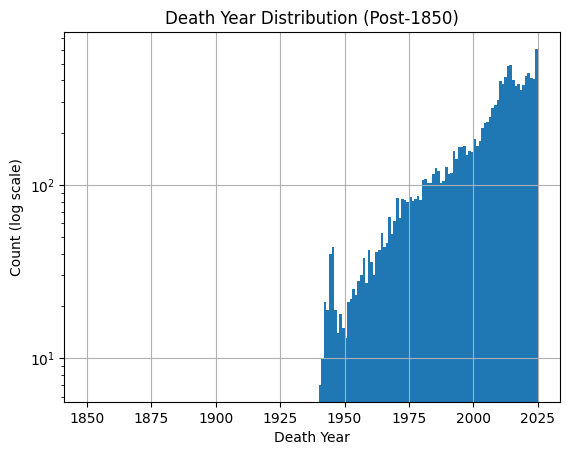

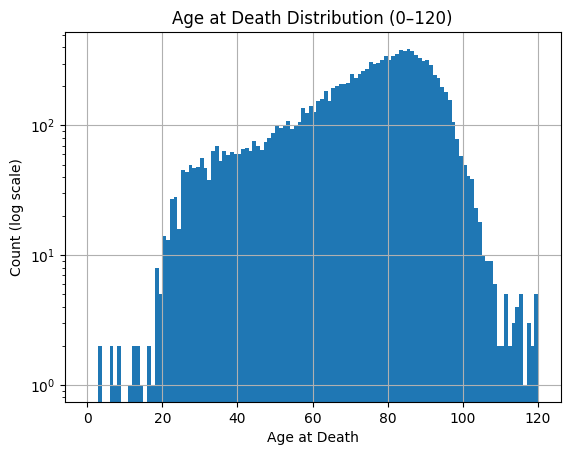

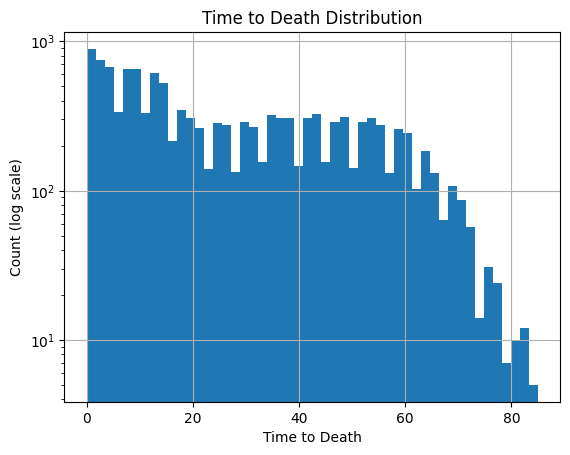

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [4]:
# 📦 Install required libraries if not already installed
!pip install -q pandas matplotlib

# 📚 Imports
import pandas as pd
import matplotlib.pyplot as plt

# === Load CSV (update this path if needed)
df = pd.read_csv("/content/wiki_with_death_info.csv")

# === Apply filters
filtered_df = df[
    (df["death_year"] >= 1850) &
    (df["age_at_death"] >= 0) & (df["age_at_death"] <= 120) &
    (df["time_to_death"] >= 0)
]

# === Plot: Death Year (after 1850)
plt.figure()
plt.hist(filtered_df["death_year"].dropna(), bins=range(1850, int(filtered_df["death_year"].max()) + 1), log=True)
plt.xlabel("Death Year")
plt.ylabel("Count (log scale)")
plt.title("Death Year Distribution (Post-1850)")
plt.grid(True)
plt.show()

# === Plot: Age at Death (0 to 120)
plt.figure()
plt.hist(filtered_df["age_at_death"].dropna(), bins=range(0, 121), log=True)
plt.xlabel("Age at Death")
plt.ylabel("Count (log scale)")
plt.title("Age at Death Distribution (0–120)")
plt.grid(True)
plt.show()

# === Plot: Time to Death (non-negative)
plt.figure()
plt.hist(filtered_df["time_to_death"].dropna(), bins=50, log=True)
plt.xlabel("Time to Death")
plt.ylabel("Count (log scale)")
plt.title("Time to Death Distribution")
plt.grid(True)
plt.show()

# === Save filtered DataFrame
filtered_path = "/content/wiki_deaths_filtered.csv"
filtered_df.to_csv(filtered_path, index=False)

# === Download filtered CSV
from google.colab import files
files.download(filtered_path)


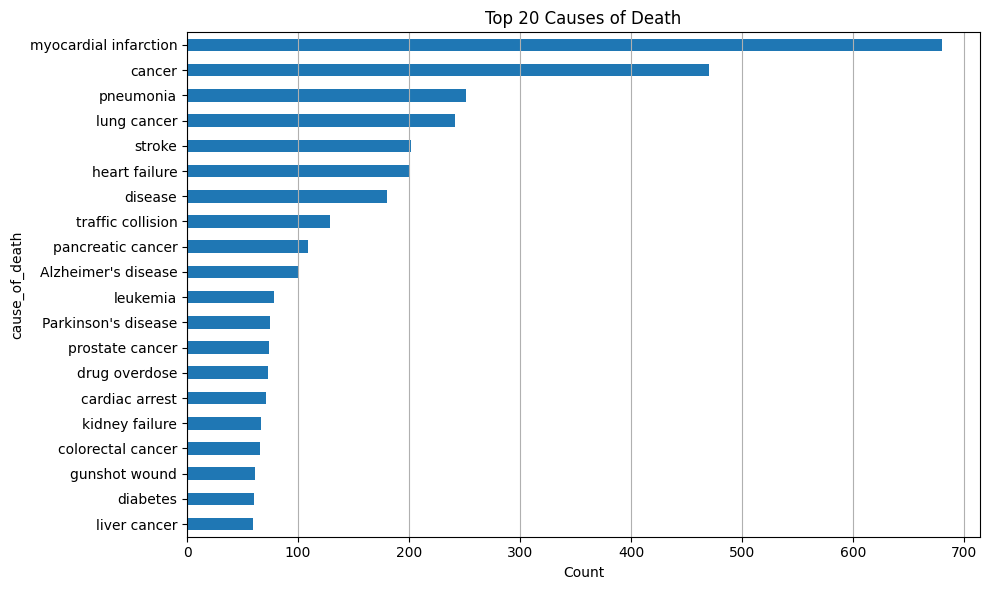

In [5]:
# 📦 Install required libraries if not already installed
!pip install -q pandas matplotlib

# 📚 Imports
import pandas as pd
import matplotlib.pyplot as plt

# === Load filtered CSV
df = pd.read_csv("/content/wiki_with_death_info.csv")

# === Apply filters
filtered_df = df[
    (df["death_year"] >= 1850) &
    (df["age_at_death"] >= 0) & (df["age_at_death"] <= 120) &
    (df["time_to_death"] >= 0)
]

# === Count top causes of death
top_causes = (
    filtered_df["cause_of_death"]
    .dropna()
    .str.strip()
    .value_counts()
    .head(20)
)

# === Plot top causes
plt.figure(figsize=(10, 6))
top_causes.sort_values().plot(kind="barh")
plt.xlabel("Count")
plt.title("Top 20 Causes of Death")
plt.grid(axis="x")
plt.tight_layout()
plt.show()

In [6]:
# 📦 Install required
!pip install -q joblib

# 📚 Imports
import pandas as pd
import os
import shutil
from joblib import Parallel, delayed
from tqdm import tqdm
from time import time, sleep

# === Mount Drive
from google.colab import drive
drive.mount('/content/drive')

# === Paths
csv_path = '/content/wiki_deaths_filtered.csv'
source_image_dir = '/content/drive/MyDrive/Gladyshev/data/wiki_crop_unzip/wiki_crop'
target_image_dir = '/content/drive/MyDrive/Gladyshev/data/wiki_crop_unzip_filtered'

# === Ensure target root exists
os.makedirs(target_image_dir, exist_ok=True)

# === Load filtered image paths
df = pd.read_csv(csv_path)
image_paths = df['full_path'].dropna().unique().tolist()

# === Copy function with logging
def copy_image(rel_path, index, total):
    src = os.path.join(source_image_dir, rel_path)
    dst = os.path.join(target_image_dir, rel_path)
    os.makedirs(os.path.dirname(dst), exist_ok=True)
    try:
        if os.path.isfile(src):
            shutil.copy2(src, dst)
            if index % 1000 == 0:
                print(f"[{index}/{total}] ✅ Copied: {rel_path}")
            return True
        else:
            if index % 1000 == 0:
                print(f"[{index}/{total}] ❌ Missing: {rel_path}")
            return False
    except Exception as e:
        print(f"[{index}/{total}] ⚠️ Error with {rel_path}: {e}")
        return False

# === Wrapper to parallelize with tqdm
def parallel_copy(image_paths, num_workers=96):
    total = len(image_paths)
    start = time()
    print(f"🚀 Starting copy of {total} images using {num_workers} workers...\n")
    results = Parallel(n_jobs=num_workers, backend='threading')(
        delayed(copy_image)(p, i, total) for i, p in enumerate(image_paths)
    )
    duration = time() - start
    print(f"\n✅ Finished copying {sum(results)} images in {duration/60:.2f} minutes.")

# === Run it!
parallel_copy(image_paths, num_workers=96)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
🚀 Starting copy of 13040 images using 96 workers...

[0/13040] ✅ Copied: 48/10000548_1925-04-04_1964.jpg
[1000/13040] ✅ Copied: 21/17095021_1925-06-03_2008.jpg
[2000/13040] ✅ Copied: 14/25102814_1914-11-29_1950.jpg
[3000/13040] ✅ Copied: 80/13289080_1970-06-08_2007.jpg
[4000/13040] ✅ Copied: 99/1138199_1947-09-22_2006.jpg
[5000/13040] ✅ Copied: 95/38347195_1933-07-08_1959.jpg
[6000/13040] ✅ Copied: 44/6546444_1952-01-30_1985.jpg
[7000/13040] ✅ Copied: 89/8258689_1917-11-18_1949.jpg
[8000/13040] ✅ Copied: 05/5062305_1948-03-08_1971.jpg
[9000/13040] ✅ Copied: 94/1961494_1936-10-13_1965.jpg
[10000/13040] ✅ Copied: 65/36709565_1941-05-14_1955.jpg
[11000/13040] ✅ Copied: 15/33826215_1928-06-23_1971.jpg
[12000/13040] ✅ Copied: 03/3194103_1938-10-17_2004.jpg
[13000/13040] ✅ Copied: 58/4990958_1939-10-28_1975.jpg

✅ Finished copying 13040 images in 3.30 minutes.


In [7]:
# 📦 Install required
!pip install -q joblib

# 📚 Imports
import pandas as pd
import os
import shutil
from joblib import Parallel, delayed
from tqdm import tqdm
from time import time

# === Mount Drive
from google.colab import drive
drive.mount('/content/drive')

# === Paths
csv_path = '/content/wiki_deaths_filtered.csv'
source_image_dir = '/content/drive/MyDrive/Gladyshev/data/wiki_crop_unzip/wiki_crop'
target_image_dir = '/content/drive/MyDrive/Gladyshev/data/wiki_crop_unzip_filtered_final'

# === Ensure target directory exists (no subfolders)
os.makedirs(target_image_dir, exist_ok=True)

# === Load filtered image paths
df = pd.read_csv(csv_path)
image_paths = df['full_path'].dropna().unique().tolist()

# === Copy function with flat output
def copy_image_flat(rel_path, index, total):
    src = os.path.join(source_image_dir, rel_path)
    filename = os.path.basename(rel_path)
    dst = os.path.join(target_image_dir, filename)
    try:
        if os.path.isfile(src):
            shutil.copy2(src, dst)
            if index % 1000 == 0:
                print(f"[{index}/{total}] ✅ Copied: {filename}")
            return True
        else:
            if index % 1000 == 0:
                print(f"[{index}/{total}] ❌ Missing: {filename}")
            return False
    except Exception as e:
        print(f"[{index}/{total}] ⚠️ Error with {filename}: {e}")
        return False

# === Parallel copy with progress
def parallel_copy_flat(image_paths, num_workers=96):
    total = len(image_paths)
    start = time()
    print(f"🚀 Starting flat copy of {total} images using {num_workers} workers...\n")
    results = Parallel(n_jobs=num_workers, backend='threading')(
        delayed(copy_image_flat)(p, i, total) for i, p in enumerate(image_paths)
    )
    duration = time() - start
    print(f"\n✅ Finished copying {sum(results)} images in {duration/60:.2f} minutes.")

# === Run it!
parallel_copy_flat(image_paths, num_workers=96)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
🚀 Starting flat copy of 13040 images using 96 workers...

[0/13040] ✅ Copied: 10000548_1925-04-04_1964.jpg
[1000/13040] ✅ Copied: 17095021_1925-06-03_2008.jpg
[2000/13040] ✅ Copied: 25102814_1914-11-29_1950.jpg
[3000/13040] ✅ Copied: 13289080_1970-06-08_2007.jpg
[4000/13040] ✅ Copied: 1138199_1947-09-22_2006.jpg
[5000/13040] ✅ Copied: 38347195_1933-07-08_1959.jpg
[6000/13040] ✅ Copied: 6546444_1952-01-30_1985.jpg
[7000/13040] ✅ Copied: 8258689_1917-11-18_1949.jpg
[8000/13040] ✅ Copied: 5062305_1948-03-08_1971.jpg
[9000/13040] ✅ Copied: 1961494_1936-10-13_1965.jpg
[10000/13040] ✅ Copied: 36709565_1941-05-14_1955.jpg
[11000/13040] ✅ Copied: 33826215_1928-06-23_1971.jpg
[12000/13040] ✅ Copied: 3194103_1938-10-17_2004.jpg
[13000/13040] ✅ Copied: 4990958_1939-10-28_1975.jpg

✅ Finished copying 13040 images in 3.10 minutes.


In [8]:
# 📦 Install required
!pip install -q joblib

# 📚 Imports
import pandas as pd
import os
import shutil
from joblib import Parallel, delayed
from tqdm import tqdm
from time import time

# === Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# === Paths
csv_path = '/content/wiki_deaths_filtered.csv'
source_image_dir = '/content/drive/MyDrive/Gladyshev/data/wiki_crop_unzip/wiki_crop'
target_image_dir = '/content/drive/MyDrive/Gladyshev/data/wiki_crop_unzip_filtered_final_again'
zip_output_path = '/content/wiki_crop_unzip_filtered_final.zip'

# === Ensure target directory exists
os.makedirs(target_image_dir, exist_ok=True)

# === Load filtered image paths
df = pd.read_csv(csv_path)
image_paths = df['full_path'].dropna().unique().tolist()

# === Copy function (flattened structure)
def copy_image_flat(rel_path, index, total):
    src = os.path.join(source_image_dir, rel_path)
    filename = os.path.basename(rel_path)
    dst = os.path.join(target_image_dir, filename)
    try:
        if os.path.isfile(src):
            shutil.copy2(src, dst)
            if index % 1000 == 0:
                print(f"[{index}/{total}] ✅ Copied: {filename}")
            return True
        else:
            if index % 1000 == 0:
                print(f"[{index}/{total}] ❌ Missing: {filename}")
            return False
    except Exception as e:
        print(f"[{index}/{total}] ⚠️ Error with {filename}: {e}")
        return False

# === Parallel copy with progress
def parallel_copy_flat(image_paths, num_workers=96):
    total = len(image_paths)
    start = time()
    print(f"🚀 Starting flat copy of {total} images using {num_workers} workers...\n")
    results = Parallel(n_jobs=num_workers, backend='threading')(
        delayed(copy_image_flat)(p, i, total) for i, p in enumerate(image_paths)
    )
    duration = time() - start
    print(f"\n✅ Finished copying {sum(results)} images in {duration/60:.2f} minutes.")

# === Run parallel copy
parallel_copy_flat(image_paths, num_workers=96)

# === Zip the flattened folder
print("\n📦 Zipping the folder...")
shutil.make_archive(zip_output_path.replace('.zip', ''), 'zip', target_image_dir)
print(f"✅ Zipped to: {zip_output_path}")

# === Trigger download
from google.colab import files
files.download(zip_output_path)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
🚀 Starting flat copy of 13040 images using 96 workers...

[0/13040] ✅ Copied: 10000548_1925-04-04_1964.jpg
[1000/13040] ✅ Copied: 17095021_1925-06-03_2008.jpg
[2000/13040] ✅ Copied: 25102814_1914-11-29_1950.jpg
[3000/13040] ✅ Copied: 13289080_1970-06-08_2007.jpg
[4000/13040] ✅ Copied: 1138199_1947-09-22_2006.jpg
[5000/13040] ✅ Copied: 38347195_1933-07-08_1959.jpg
[6000/13040] ✅ Copied: 6546444_1952-01-30_1985.jpg
[7000/13040] ✅ Copied: 8258689_1917-11-18_1949.jpg
[8000/13040] ✅ Copied: 5062305_1948-03-08_1971.jpg
[9000/13040] ✅ Copied: 1961494_1936-10-13_1965.jpg
[10000/13040] ✅ Copied: 36709565_1941-05-14_1955.jpg
[11000/13040] ✅ Copied: 33826215_1928-06-23_1971.jpg
[12000/13040] ✅ Copied: 3194103_1938-10-17_2004.jpg
[13000/13040] ✅ Copied: 4990958_1939-10-28_1975.jpg

✅ Finished copying 13040 images in 3.07 minutes.

📦 Zipping the folder...
✅ Zipped to: /co

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

👤 Total unique people: 12904
📸 Images per person (top 10):
name
Tom Johnson      4
James Brown      4
John McCarthy    3
Sam Johnson      3
John Hughes      3
Roy Williams     3
Peter White      3
Gary Collins     3
Bobby Smith      3
Phil Ryan        3
Name: count, dtype: int64


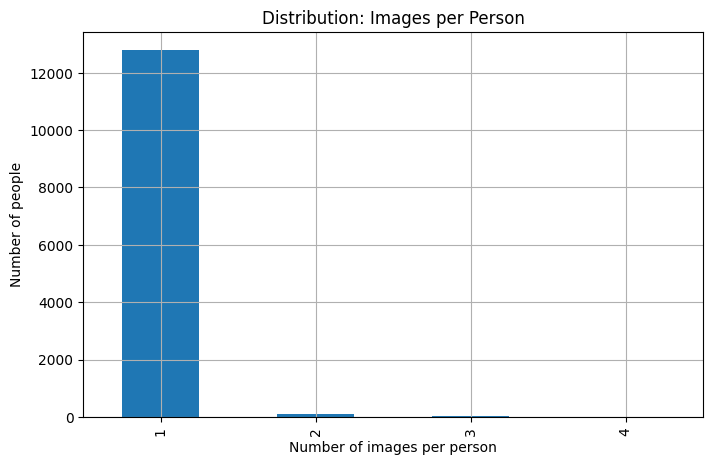

🎂 Age distribution (sample):
age_at_death
3     2
6     2
7     1
8     2
11    1
12    2
13    2
14    1
16    2
17    1
Name: count, dtype: int64


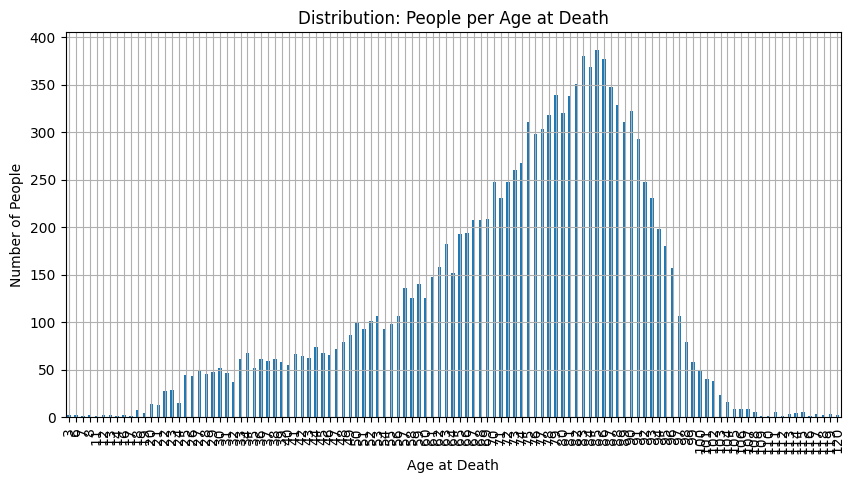

In [9]:
# 📚 Imports
import pandas as pd
import matplotlib.pyplot as plt

# === Load filtered CSV
csv_path = '/content/wiki_deaths_filtered.csv'
df = pd.read_csv(csv_path)

# === (1) Images per person
images_per_person = df['name'].value_counts().sort_values(ascending=False)
print(f"👤 Total unique people: {images_per_person.shape[0]}")
print(f"📸 Images per person (top 10):\n{images_per_person.head(10)}")

# === Plot histogram of image counts per person
plt.figure(figsize=(8,5))
images_per_person.value_counts().sort_index().plot(kind='bar')
plt.xlabel("Number of images per person")
plt.ylabel("Number of people")
plt.title("Distribution: Images per Person")
plt.grid(True)
plt.show()

# === (2) People per age at death
df_unique = df.drop_duplicates(subset='name')  # Count each person only once
people_per_age = df_unique['age_at_death'].dropna().astype(int).value_counts().sort_index()
print(f"🎂 Age distribution (sample):\n{people_per_age.head(10)}")

# === Plot histogram of people per age
plt.figure(figsize=(10,5))
people_per_age.plot(kind='bar')
plt.xlabel("Age at Death")
plt.ylabel("Number of People")
plt.title("Distribution: People per Age at Death")
plt.grid(True)
plt.show()


📊 People per age bin:
age_at_death
0-9           7
10-19        34
20-29       363
30-39       558
40-49       735
50-59      1123
60-69      1898
70-79      2896
80-89      3511
90-99      1599
100-109     151
110-119      29
120-129       0
Name: count, dtype: int64


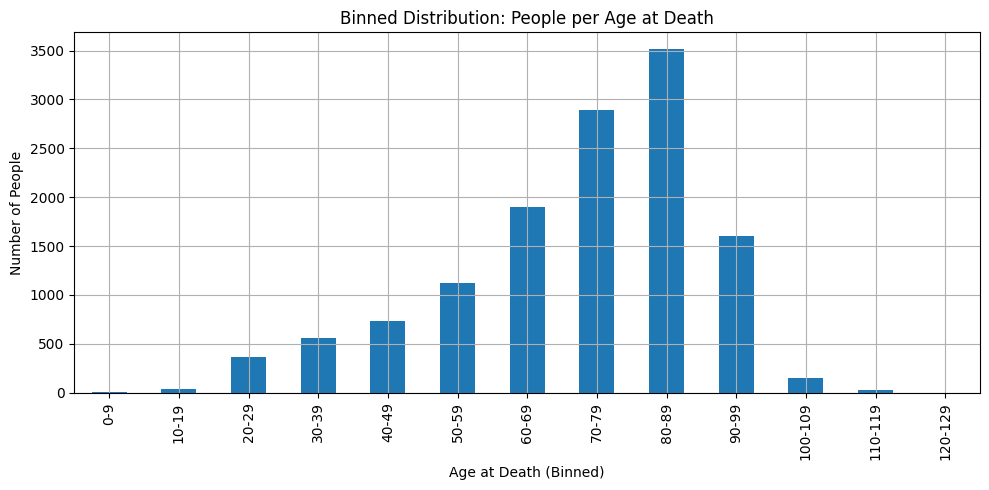

In [10]:
# 📚 Imports
import pandas as pd
import matplotlib.pyplot as plt

# === Load filtered CSV
csv_path = '/content/wiki_deaths_filtered.csv'
df = pd.read_csv(csv_path)

# === Deduplicate by person
df_unique = df.drop_duplicates(subset='name')
ages = df_unique['age_at_death'].dropna()

# === Bin ages into 10-year intervals
bins = list(range(0, 131, 10))  # e.g., 0–10, 11–20, ..., 121–130
labels = [f"{i}-{i+9}" for i in bins[:-1]]
age_binned = pd.cut(ages, bins=bins, labels=labels, right=True)

# === Count people per bin
binned_counts = age_binned.value_counts().sort_index()

# === Print summary
print("📊 People per age bin:")
print(binned_counts)

# === Plot
plt.figure(figsize=(10,5))
binned_counts.plot(kind='bar')
plt.xlabel("Age at Death (Binned)")
plt.ylabel("Number of People")
plt.title("Binned Distribution: People per Age at Death")
plt.grid(True)
plt.tight_layout()
plt.show()


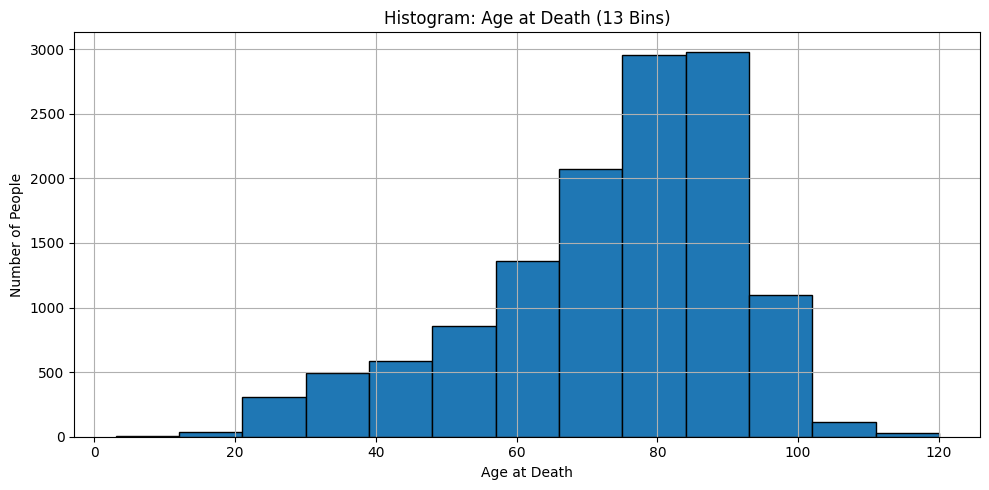

In [11]:
# 📚 Imports
import pandas as pd
import matplotlib.pyplot as plt

# === Load filtered CSV
csv_path = '/content/wiki_deaths_filtered.csv'
df = pd.read_csv(csv_path)

# === Deduplicate by person
df_unique = df.drop_duplicates(subset='name')
ages = df_unique['age_at_death'].dropna()

# === Plot histogram with 13 bins
plt.figure(figsize=(10, 5))
plt.hist(ages, bins=13, edgecolor='black')
plt.xlabel("Age at Death")
plt.ylabel("Number of People")
plt.title("Histogram: Age at Death (13 Bins)")
plt.grid(True)
plt.tight_layout()
plt.show()


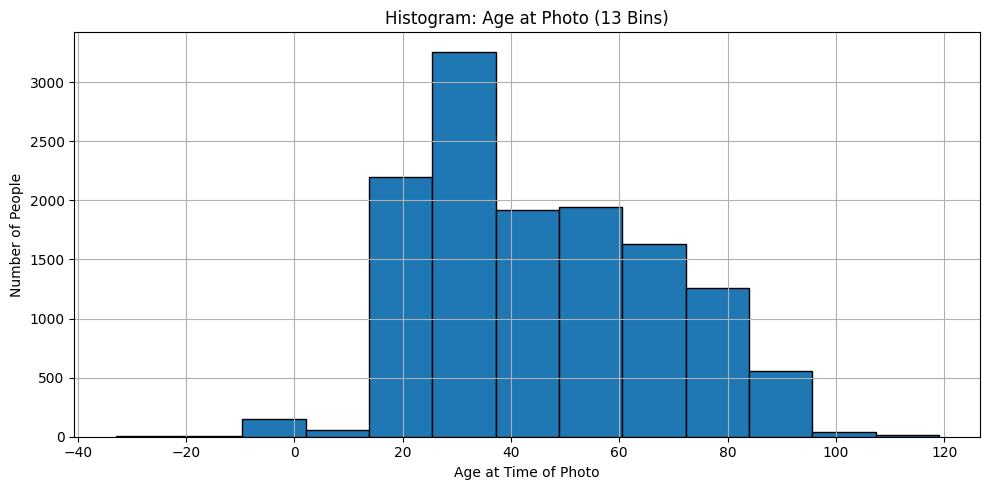

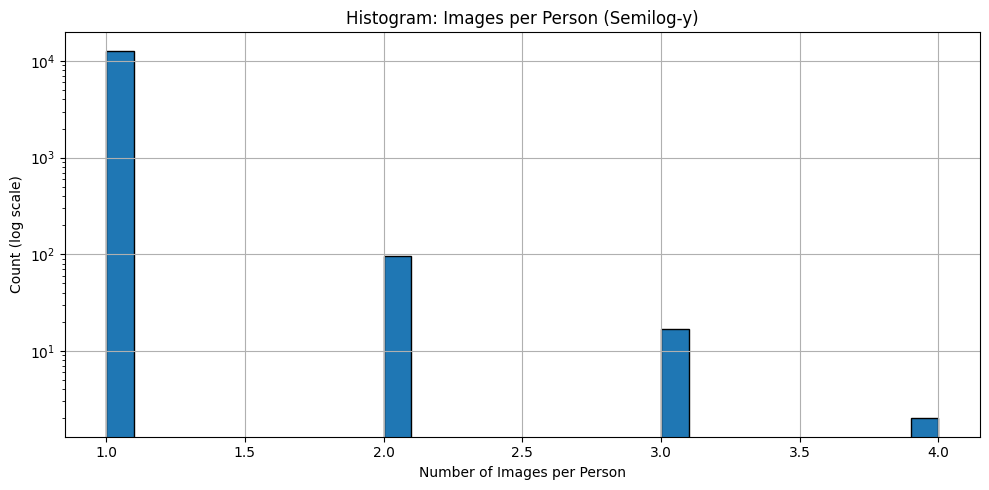

In [12]:
# 📚 Imports
import pandas as pd
import matplotlib.pyplot as plt

# === Load filtered CSV
csv_path = '/content/wiki_deaths_filtered.csv'
df = pd.read_csv(csv_path)

# === 1. Histogram of Age at Photo (13 Bins)
df_age_photo = df.dropna(subset=["dob", "photo_taken"]).copy()
df_age_photo["age_at_photo"] = df_age_photo["photo_taken"] - pd.to_datetime(df_age_photo["dob"]).dt.year

plt.figure(figsize=(10, 5))
plt.hist(df_age_photo["age_at_photo"], bins=13, edgecolor='black')
plt.xlabel("Age at Time of Photo")
plt.ylabel("Number of People")
plt.title("Histogram: Age at Photo (13 Bins)")
plt.grid(True)
plt.tight_layout()
plt.show()

# === 2. Semilog-y Histogram: Images per Person
images_per_person = df["name"].value_counts()

plt.figure(figsize=(10, 5))
plt.hist(images_per_person, bins=30, edgecolor='black', log=True)
plt.xlabel("Number of Images per Person")
plt.ylabel("Count (log scale)")
plt.title("Histogram: Images per Person (Semilog-y)")
plt.grid(True)
plt.tight_layout()
plt.show()


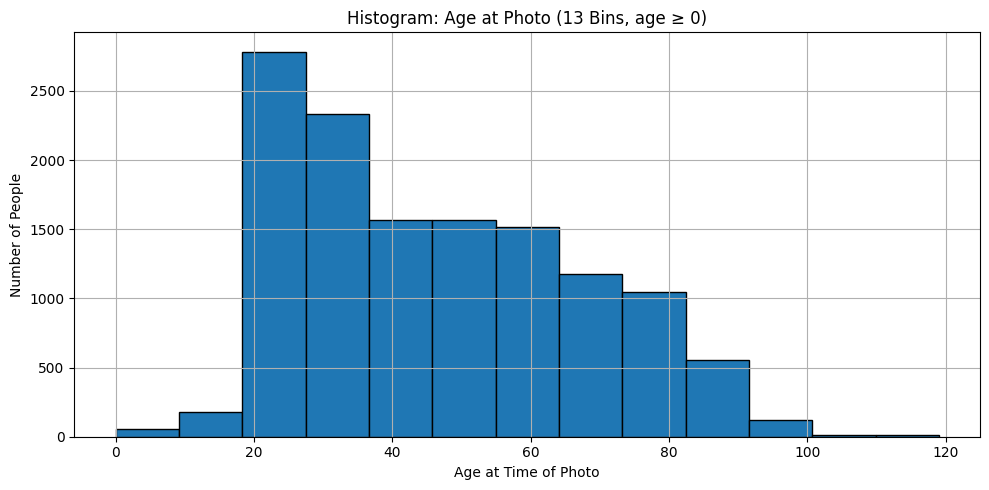

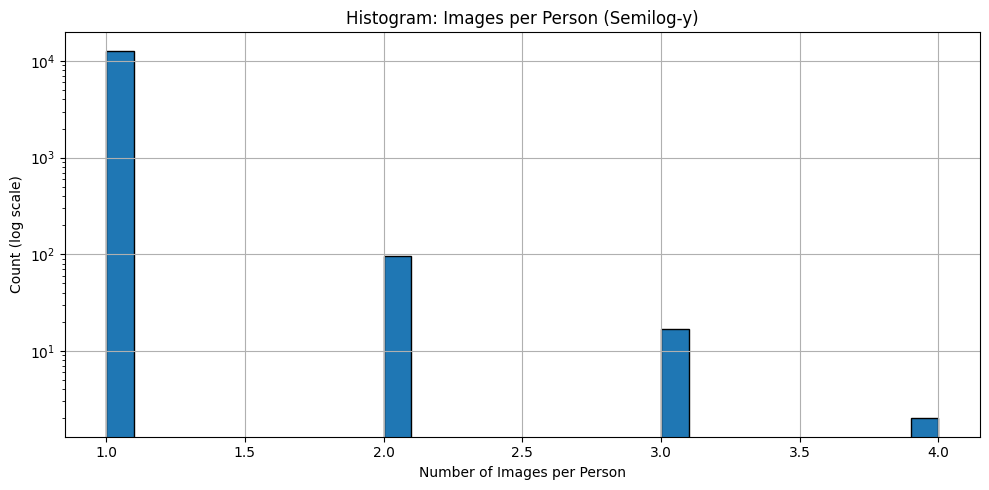

In [13]:
# 📚 Imports
import pandas as pd
import matplotlib.pyplot as plt

# === Load filtered CSV
csv_path = '/content/wiki_deaths_filtered.csv'
df = pd.read_csv(csv_path)

# === 1. Histogram of Age at Photo (13 Bins, filtered age >= 0)
df_age_photo = df.dropna(subset=["dob", "photo_taken"]).copy()
df_age_photo["age_at_photo"] = df_age_photo["photo_taken"] - pd.to_datetime(df_age_photo["dob"]).dt.year
df_age_photo = df_age_photo[df_age_photo["age_at_photo"] >= 0]

plt.figure(figsize=(10, 5))
plt.hist(df_age_photo["age_at_photo"], bins=13, edgecolor='black')
plt.xlabel("Age at Time of Photo")
plt.ylabel("Number of People")
plt.title("Histogram: Age at Photo (13 Bins, age ≥ 0)")
plt.grid(True)
plt.tight_layout()
plt.show()

# === 2. Semilog-y Histogram: Images per Person
images_per_person = df["name"].value_counts()

plt.figure(figsize=(10, 5))
plt.hist(images_per_person, bins=30, edgecolor='black', log=True)
plt.xlabel("Number of Images per Person")
plt.ylabel("Count (log scale)")
plt.title("Histogram: Images per Person (Semilog-y)")
plt.grid(True)
plt.tight_layout()
plt.show()


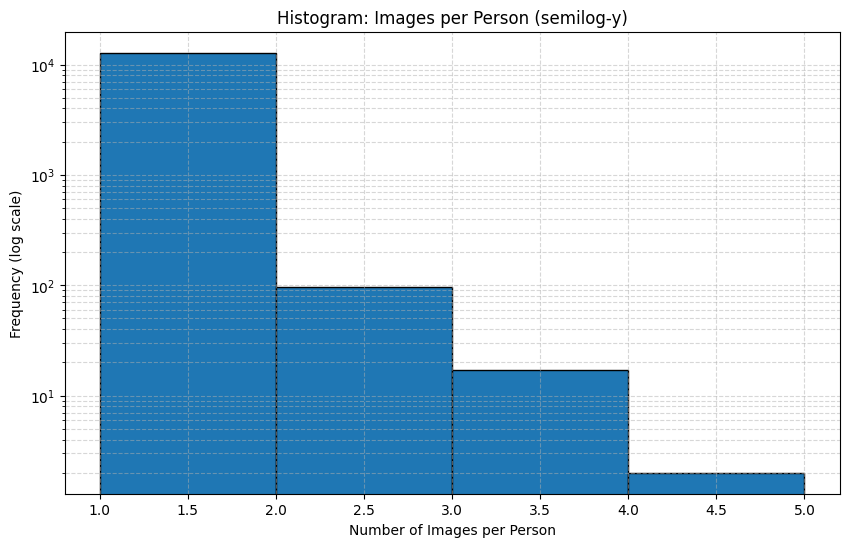

KeyError: 'age_at_photo'

<Figure size 1000x600 with 0 Axes>

In [15]:
# 📚 Imports
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# === Load the filtered dataset (with valid age_at_photo)
csv_path = "/content/wiki_deaths_filtered.csv"
df = pd.read_csv(csv_path)

# === Histogram 1: Images per person (semilog-y)
counts_per_person = df['name'].value_counts()

plt.figure(figsize=(10, 6))
plt.hist(counts_per_person.values, bins=range(1, counts_per_person.max() + 2), edgecolor='black')
plt.yscale("log")
plt.xlabel("Number of Images per Person")
plt.ylabel("Frequency (log scale)")
plt.title("Histogram: Images per Person (semilog-y)")
plt.grid(True, which='both', linestyle='--', alpha=0.5)
plt.show()

# === Histogram 2: Age at photo in 13 bins
plt.figure(figsize=(10, 6))
plt.hist(df["age_at_photo"], bins=13, edgecolor="black")
plt.xlabel("Age at Photo")
plt.ylabel("Number of Images")
plt.title("Histogram: Age at Photo (13 Bins)")
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()


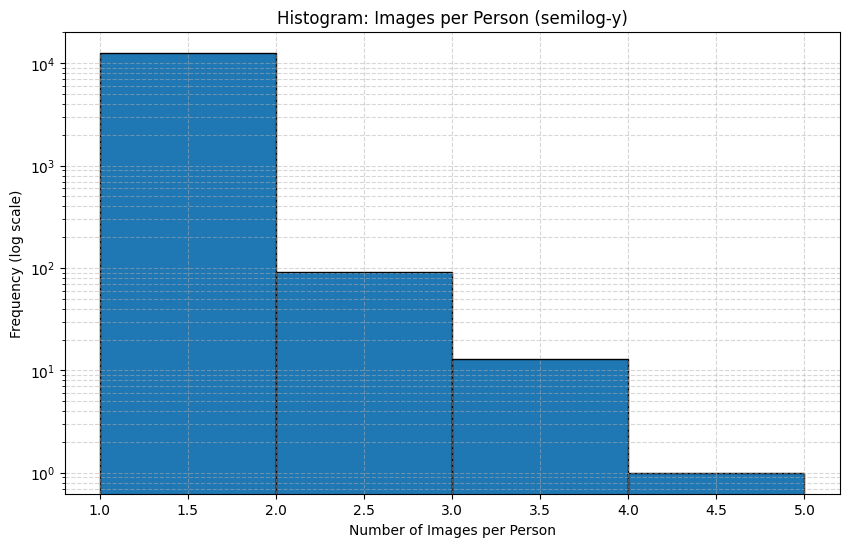

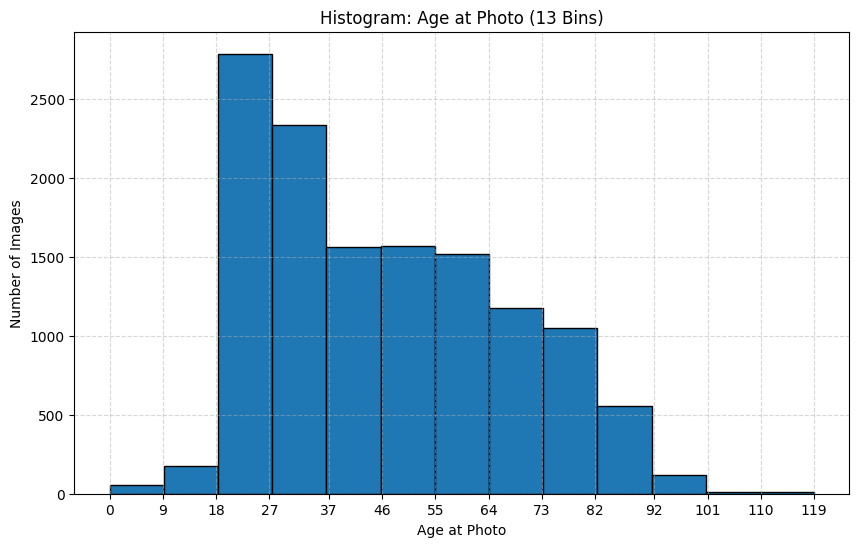

In [16]:
# 📚 Imports
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# === Load the filtered dataset
csv_path = "/content/wiki_deaths_filtered.csv"
df = pd.read_csv(csv_path)
df["dob"] = pd.to_datetime(df["dob"], errors="coerce")

# === Compute age_at_photo
df["age_at_photo"] = df["photo_taken"] - df["dob"].dt.year
df_valid = df[df["age_at_photo"] >= 0]

# === Histogram 1: Images per person (semilog-y)
counts_per_person = df_valid['name'].value_counts()

plt.figure(figsize=(10, 6))
plt.hist(counts_per_person.values, bins=range(1, counts_per_person.max() + 2), edgecolor='black')
plt.yscale("log")
plt.xlabel("Number of Images per Person")
plt.ylabel("Frequency (log scale)")
plt.title("Histogram: Images per Person (semilog-y)")
plt.grid(True, which='both', linestyle='--', alpha=0.5)
plt.show()

# === Histogram 2: Age at photo (13 bins, clean ticks)
plt.figure(figsize=(10, 6))
bins = np.linspace(df_valid["age_at_photo"].min(), df_valid["age_at_photo"].max(), 14)
plt.hist(df_valid["age_at_photo"], bins=bins, edgecolor="black")
plt.xlabel("Age at Photo")
plt.ylabel("Number of Images")
plt.title("Histogram: Age at Photo (13 Bins)")
plt.xticks(np.round(bins).astype(int))  # clean integer ticks
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()


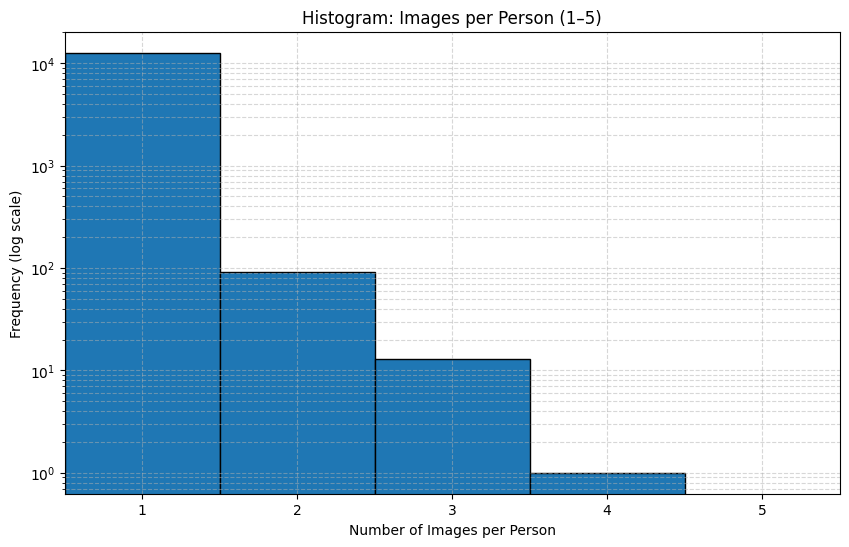

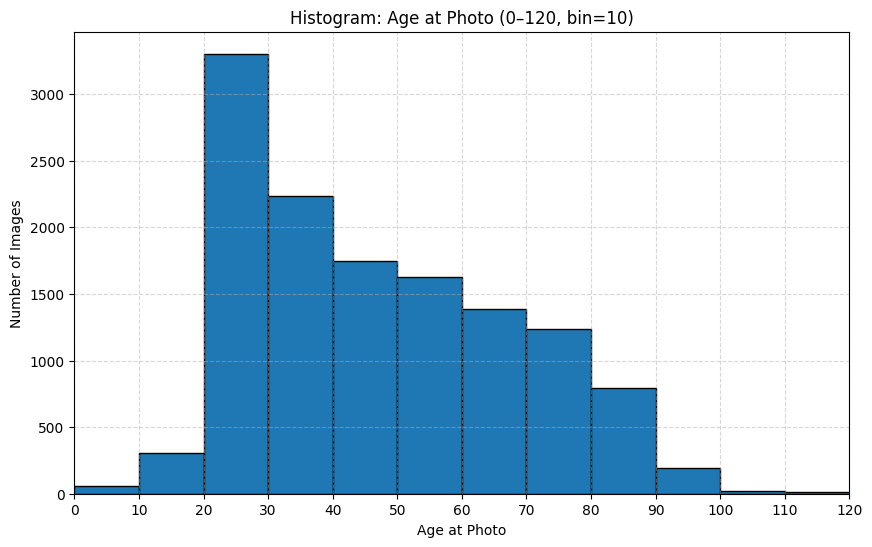

In [18]:
# 📚 Imports
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# === Load the filtered dataset
csv_path = "/content/wiki_deaths_filtered.csv"
df = pd.read_csv(csv_path)
df["dob"] = pd.to_datetime(df["dob"], errors="coerce")

# === Compute age_at_photo and filter valid
df["age_at_photo"] = df["photo_taken"] - df["dob"].dt.year
df_valid = df[df["age_at_photo"] >= 0]

# === Histogram 1: Images per person (1–5, semilog-y)
counts_per_person = df_valid["name"].value_counts()

plt.figure(figsize=(10, 6))
bins = np.arange(1, 7) - 0.5  # center at 1, 2, ..., 5
plt.hist(counts_per_person.values, bins=bins, edgecolor="black")
plt.yscale("log")
plt.xlabel("Number of Images per Person")
plt.ylabel("Frequency (log scale)")
plt.title("Histogram: Images per Person (1–5)")
plt.xticks(np.arange(1, 6))
plt.grid(True, which="both", linestyle="--", alpha=0.5)
plt.xlim(0.5, 5.5)
plt.show()

# === Histogram 2: Age at photo (0–120, bins of 10)
plt.figure(figsize=(10, 6))
bins = np.arange(0, 130, 10)
plt.hist(df_valid["age_at_photo"], bins=bins, edgecolor="black")
plt.xlabel("Age at Photo")
plt.ylabel("Number of Images")
plt.title("Histogram: Age at Photo (0–120, bin=10)")
plt.xticks(np.arange(0, 121, 10))
plt.grid(True, linestyle="--", alpha=0.5)
plt.xlim(0, 120)
plt.show()


https://chatgpt.com/share/686a04ad-54b8-8008-ac86-7e9018b98021